# A Multimodal Symphony: Integrating Taste and Sound through Generative

AI

[Matteo Spanio](https://matteospanio.github.io) [](https://orcid.org/0000-0002-2436-7208) ([University of Padova](https://www.unipd.it))  
[Massimiliano Zampini](https://webapps.unitn.it/du/en/Persona/PER0000123/Curriculum) [](https://orcid.org/0000-0001-5950-7365) ([University of Trento](https://www.unitn.it/))  
[Antonio Rodà](https://www.dei.unipd.it/~roda/) [](https://orcid.org/0000-0001-9921-0590) ([University of Padova](https://www.unipd.it))  
Franco Pierucci ([SoundFood s.r.l.](https://www.soundfood.it/))  
February 1, 2025

In recent decades, neuroscientific and psychological research by Spence, Wang, Zampini and others has traced direct relationships between taste and auditory perceptions. This article explores multimodal generative models capable of converting taste information into music, building on this foundational research. We provide a brief review of the state of the art in this field, highlighting key findings and methodologies. Additionally, we present an experiment in which we fine-tuned a Large Language Model (LLM) to generate music based on detailed taste descriptions provided for each musical piece. The results are promising: the fine-tuned model produces music that more coherently reflects the input taste descriptions compared to the non-fine-tuned model. This study represents a significant step towards understanding and developing embodied interactions between AI, sound, and taste, opening new possibilities in the field of generative AI.

## Demographic Analysis

The data used for this study were collected through an [online survey](https://www.psytoolkit.org/c/3.4.6/survey?s=YmxcY) via PsyToolkit’s web platform \[@stoet_psytoolkit_2017\]. Inclusion criteria were that participants had to be over eighteen years old and have access to a device capable of playing audio files.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Caricamento pacchetto: 'psych'

I seguenti oggetti sono mascherati da 'package:ggplot2':

    %+%, alpha

ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(columns)

  # Now:
  data %>% select(all_of(columns))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.

Of 141 people reached, only 111 completed the questionnaire (61 males, 46 females, 2 other, 2 prefer not to say, see @fig-demographic-info-1), null or partial answers were considered as withdrawal from the questionnaire, therefore only complete answers were taken into consideration for the following analysis.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb1"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="fu">library</span>(ggplot2)</span>
<span id="cb1-2"><a href="#cb1-2" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb1-3"><a href="#cb1-3" aria-hidden="true" tabindex="-1"></a><span class="co"># Assuming your dataframe is named &#39;data_pinfo&#39; and the gender column is &#39;sex&#39;</span></span>
<span id="cb1-4"><a href="#cb1-4" aria-hidden="true" tabindex="-1"></a>gender_distribution <span class="ot">&lt;-</span> data_pinfo <span class="sc">|&gt;</span></span>
<span id="cb1-5"><a href="#cb1-5" aria-hidden="true" tabindex="-1"></a>  <span class="fu">count</span>(sex) <span class="sc">|&gt;</span></span>
<span id="cb1-6"><a href="#cb1-6" aria-hidden="true" tabindex="-1"></a>  <span class="fu">mutate</span>(<span class="at">percentage =</span> n <span class="sc">/</span> <span class="fu">sum</span>(n) <span class="sc">*</span> <span class="dv">100</span>)</span>
<span id="cb1-7"><a href="#cb1-7" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb1-8"><a href="#cb1-8" aria-hidden="true" tabindex="-1"></a><span class="fu">ggplot</span>(gender_distribution, <span class="fu">aes</span>(<span class="at">x =</span> <span class="st">&quot;&quot;</span>, <span class="at">y =</span> percentage, <span class="at">fill =</span> sex)) <span class="sc">+</span></span>
<span id="cb1-9"><a href="#cb1-9" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_bar</span>(<span class="at">stat =</span> <span class="st">&quot;identity&quot;</span>, <span class="at">width =</span> <span class="dv">1</span>) <span class="sc">+</span></span>
<span id="cb1-10"><a href="#cb1-10" aria-hidden="true" tabindex="-1"></a>  <span class="fu">coord_polar</span>(<span class="st">&quot;y&quot;</span>) <span class="sc">+</span></span>
<span id="cb1-11"><a href="#cb1-11" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_void</span>()</span></code></pre></div>
<div class="cell-output-display">
<p>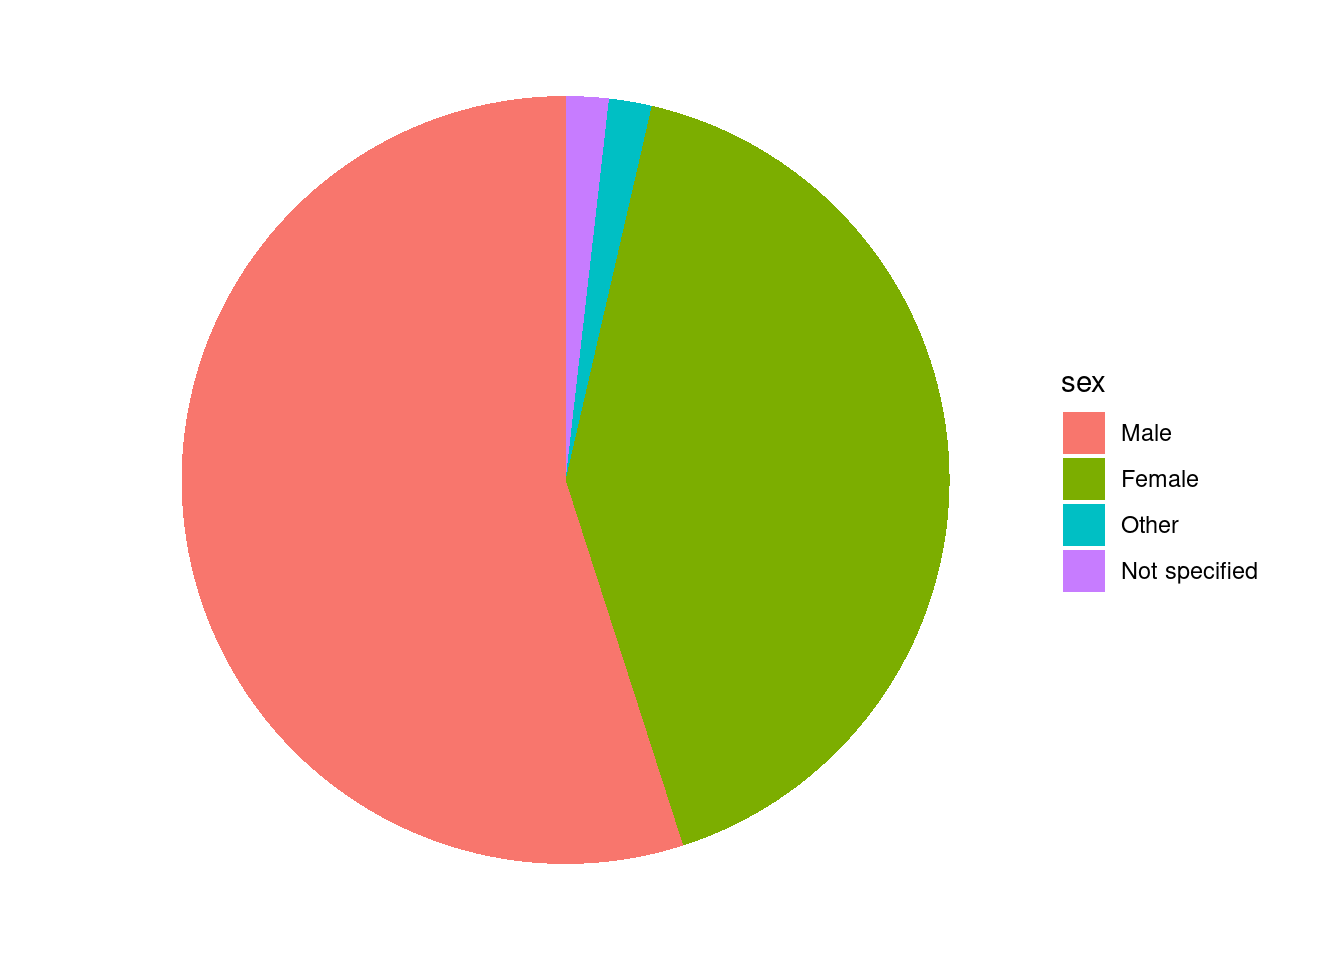</p>
</div>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb2"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb2-1"><a href="#cb2-1" aria-hidden="true" tabindex="-1"></a>ethnicity_distribution <span class="ot">&lt;-</span> data_pinfo <span class="sc">|&gt;</span></span>
<span id="cb2-2"><a href="#cb2-2" aria-hidden="true" tabindex="-1"></a>  <span class="fu">count</span>(ethnicity) <span class="sc">|&gt;</span></span>
<span id="cb2-3"><a href="#cb2-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">mutate</span>(<span class="at">percentage =</span> n <span class="sc">/</span> <span class="fu">sum</span>(n) <span class="sc">*</span> <span class="dv">100</span>)</span>
<span id="cb2-4"><a href="#cb2-4" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb2-5"><a href="#cb2-5" aria-hidden="true" tabindex="-1"></a><span class="fu">ggplot</span>(ethnicity_distribution, <span class="fu">aes</span>(<span class="at">x =</span> <span class="st">&quot;&quot;</span>, <span class="at">y =</span> percentage, <span class="at">fill =</span> ethnicity)) <span class="sc">+</span></span>
<span id="cb2-6"><a href="#cb2-6" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_bar</span>(<span class="at">stat =</span> <span class="st">&quot;identity&quot;</span>, <span class="at">width =</span> <span class="dv">1</span>) <span class="sc">+</span></span>
<span id="cb2-7"><a href="#cb2-7" aria-hidden="true" tabindex="-1"></a>  <span class="fu">coord_polar</span>(<span class="st">&quot;y&quot;</span>) <span class="sc">+</span></span>
<span id="cb2-8"><a href="#cb2-8" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_void</span>()</span></code></pre></div>
<div class="cell-output-display">
<p>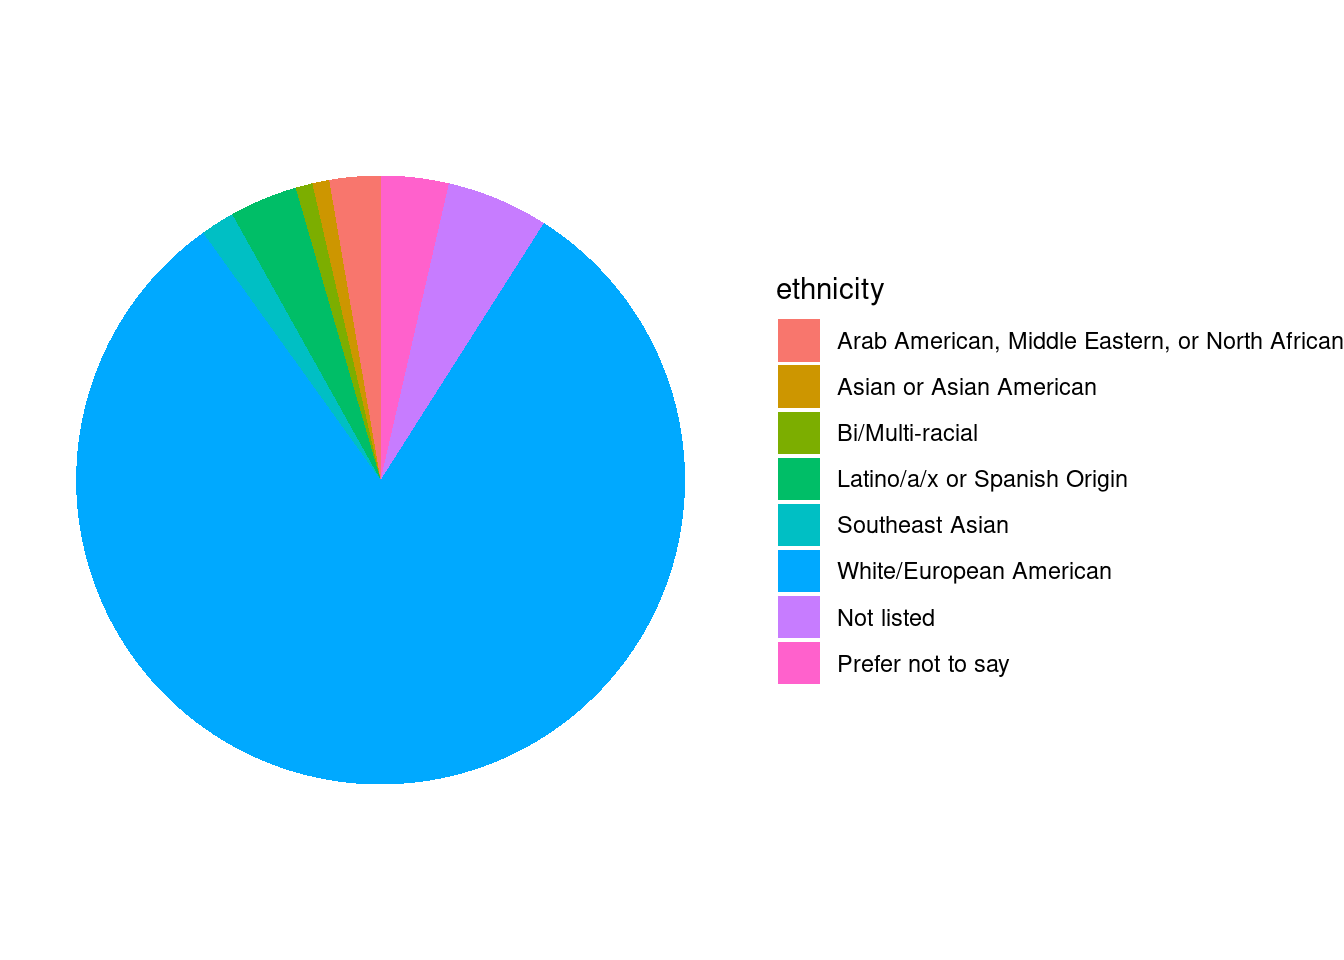</p>
</div>
</div>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb1"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a>hearing_experience_distribution <span class="ot">&lt;-</span> data_pinfo <span class="sc">|&gt;</span></span>
<span id="cb1-2"><a href="#cb1-2" aria-hidden="true" tabindex="-1"></a>  <span class="fu">count</span>(hearing_experience) <span class="sc">|&gt;</span></span>
<span id="cb1-3"><a href="#cb1-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">mutate</span>(<span class="at">percentage =</span> n <span class="sc">/</span> <span class="fu">sum</span>(n) <span class="sc">*</span> <span class="dv">100</span>)</span>
<span id="cb1-4"><a href="#cb1-4" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb1-5"><a href="#cb1-5" aria-hidden="true" tabindex="-1"></a><span class="fu">ggplot</span>(hearing_experience_distribution, <span class="fu">aes</span>(<span class="at">x =</span> <span class="st">&quot;&quot;</span>, <span class="at">y =</span> percentage, <span class="at">fill =</span> hearing_experience)) <span class="sc">+</span></span>
<span id="cb1-6"><a href="#cb1-6" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_bar</span>(<span class="at">stat =</span> <span class="st">&quot;identity&quot;</span>, <span class="at">width =</span> <span class="dv">1</span>) <span class="sc">+</span></span>
<span id="cb1-7"><a href="#cb1-7" aria-hidden="true" tabindex="-1"></a>  <span class="fu">coord_polar</span>(<span class="st">&quot;y&quot;</span>) <span class="sc">+</span></span>
<span id="cb1-8"><a href="#cb1-8" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_void</span>()</span></code></pre></div>
<div class="cell-output-display">
<p>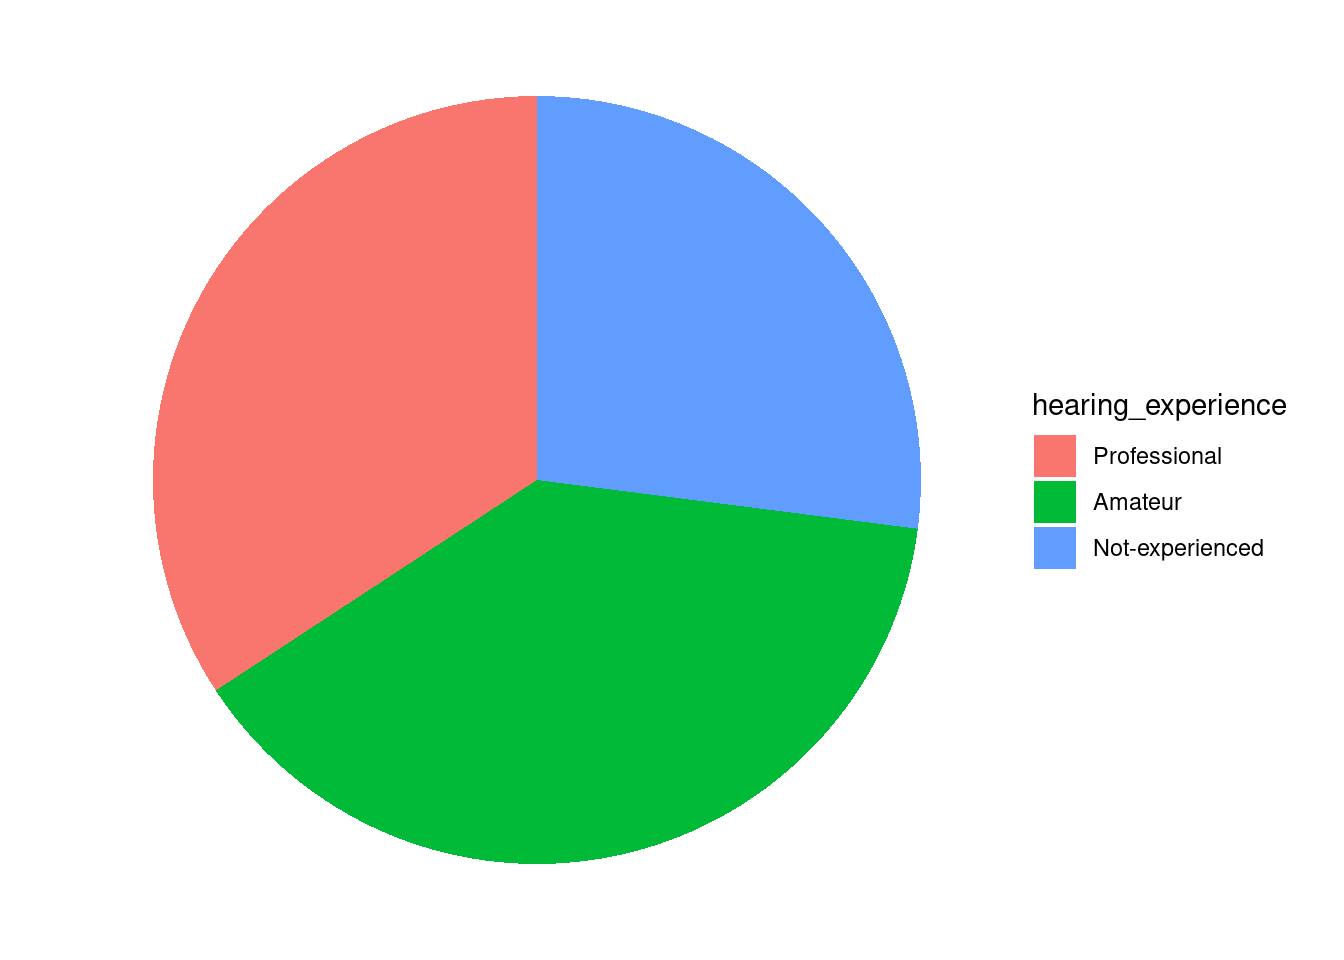</p>
</div>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb2"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb2-1"><a href="#cb2-1" aria-hidden="true" tabindex="-1"></a>eating_experience_distribution <span class="ot">&lt;-</span> data_pinfo <span class="sc">|&gt;</span></span>
<span id="cb2-2"><a href="#cb2-2" aria-hidden="true" tabindex="-1"></a>  <span class="fu">count</span>(eating_experience) <span class="sc">|&gt;</span></span>
<span id="cb2-3"><a href="#cb2-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">mutate</span>(<span class="at">percentage =</span> n <span class="sc">/</span> <span class="fu">sum</span>(n) <span class="sc">*</span> <span class="dv">100</span>)</span>
<span id="cb2-4"><a href="#cb2-4" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb2-5"><a href="#cb2-5" aria-hidden="true" tabindex="-1"></a><span class="fu">ggplot</span>(eating_experience_distribution, <span class="fu">aes</span>(<span class="at">x =</span> <span class="st">&quot;&quot;</span>, <span class="at">y =</span> percentage, <span class="at">fill =</span> eating_experience)) <span class="sc">+</span></span>
<span id="cb2-6"><a href="#cb2-6" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_bar</span>(<span class="at">stat =</span> <span class="st">&quot;identity&quot;</span>, <span class="at">width =</span> <span class="dv">1</span>) <span class="sc">+</span></span>
<span id="cb2-7"><a href="#cb2-7" aria-hidden="true" tabindex="-1"></a>  <span class="fu">coord_polar</span>(<span class="st">&quot;y&quot;</span>) <span class="sc">+</span></span>
<span id="cb2-8"><a href="#cb2-8" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_void</span>()</span></code></pre></div>
<div class="cell-output-display">
<p>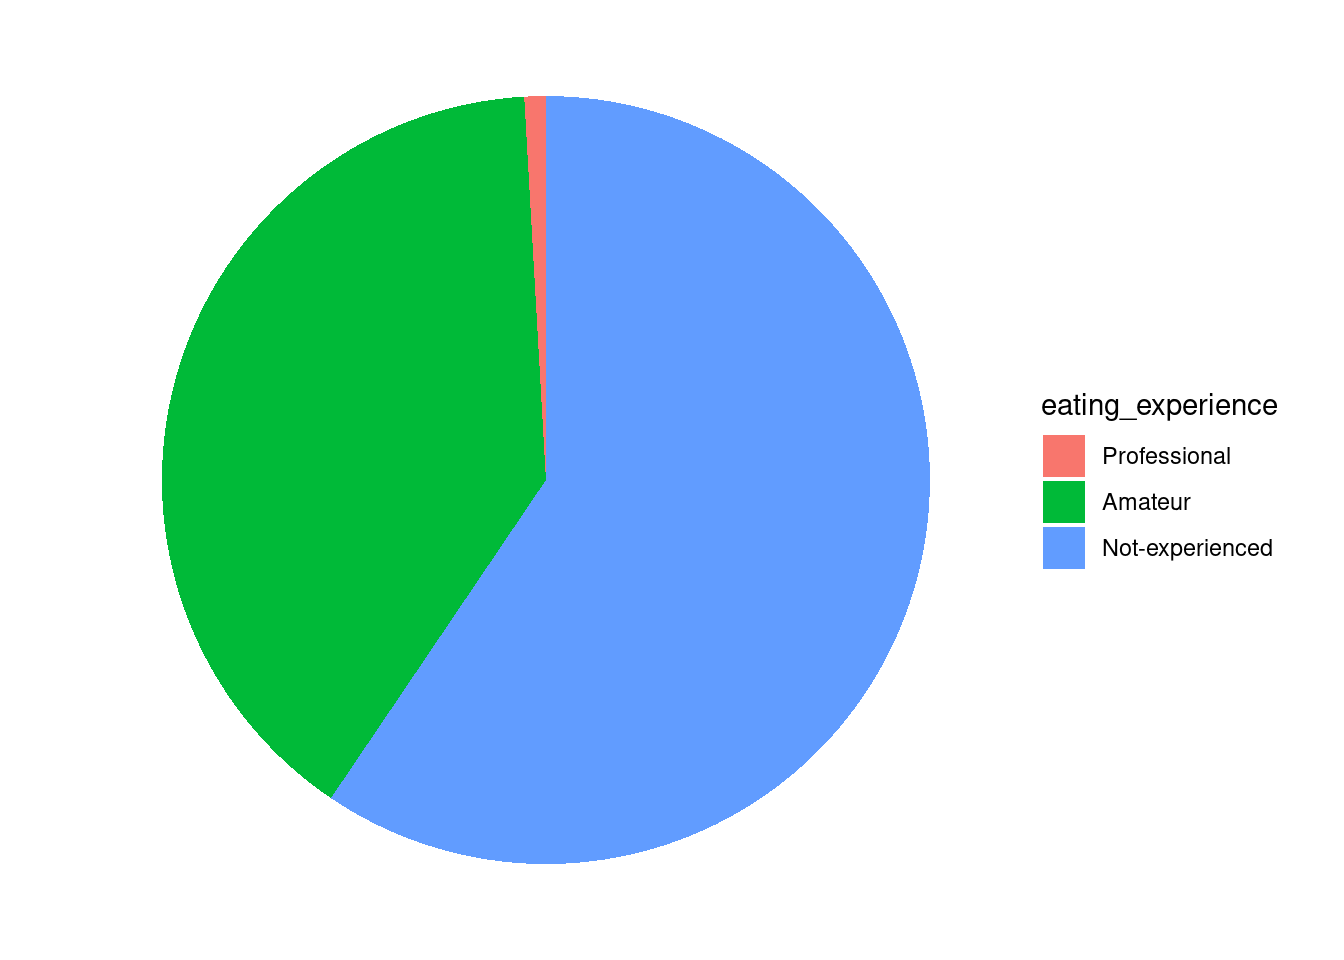</p>
</div>
</div>
</div></td>
</tr>
</tbody>
</table>

Demographic characteristics of the study’s participants.

Overall the reached population has a mean age of 32 years, whit a maximum of 75 and a minimum of 19. The mean time spent on the survey was 9 minutes, with a standard deviation of 3.3. Along with age, gender and execution time also data about musical and eating experience have been collected: @fig-demographic-info-2 displays the ethnicity distribution of the population, the majority of participants recognize themself as *White/European American*, participants have an almost equally distributed experience in listening to music (see @fig-demographic-info-3), while just one participant recognized himself as an experienced eater and the major part of the sample population declared to be not-experienced in tasting food (@fig-demographic-info-4).

## Model Preference Analysis

The first task in the survey involved participants listening to two audio clips, each corresponding to a taste description chosen randomly from *sweet*, *sour*, *bitter*, and *salty*. The goal was to determine which audio sample best matched the given taste description. The two clips were generated by different versions of the MusicGEN model \[@copet2024simplecontrollablemusicgeneration\]: a fine-tuned version and the original [1], base model, released by Meta. Participants were asked to express their preference for the first or second clip by moving a slider ranging from 0 to 10, where 0 indicated a strong preference for the first clip and 10 indicated a strong preference for the second, @fig-task1 shows the survey’s first question interface.

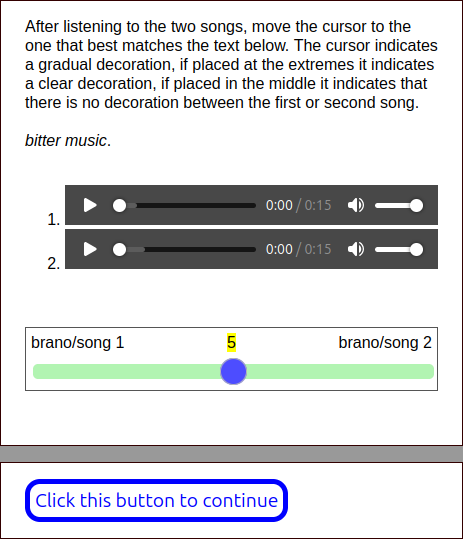{#fig-task1 .lightbox }

To ensure randomization and avoid any bias, the taste descriptions and audio clips were presented in a random order. In the analysis the scores are normalized as follows: scores from 0 to 4 are interpreted as a preference for the base model, scores between 6 and 10 indicate a preference for the fine-tuned model, and scores of 5 are treated as neutral.

The underlying research question guiding this task was to assess if the fine tuned model output better matches taste descriptions than the sounds generated by the base model.

### Data Visualization

The distribution of scores across all participants is presented in @fig-model-pref-1. The histogram and density plot show the spread of scores, allowing us to visually assess the preference for one model over the other. The base model and fine-tuned model preferences are expected to manifest as peaks around the lower and higher end of the score range, respectively.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb1"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="fu">ggplot</span>(data_task1, <span class="fu">aes</span>(<span class="at">x =</span> score)) <span class="sc">+</span></span>
<span id="cb1-2"><a href="#cb1-2" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_histogram</span>(<span class="at">binwidth =</span> <span class="dv">1</span>, <span class="at">fill =</span> <span class="st">&quot;skyblue&quot;</span>, <span class="at">color =</span> <span class="st">&quot;black&quot;</span>, <span class="at">alpha =</span> <span class="fl">0.7</span>) <span class="sc">+</span></span>
<span id="cb1-3"><a href="#cb1-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_density</span>(<span class="fu">aes</span>(<span class="at">y =</span> <span class="fu">after_stat</span>(count)), <span class="at">fill =</span> <span class="st">&quot;lightgreen&quot;</span>, <span class="at">alpha =</span> <span class="fl">0.4</span>) <span class="sc">+</span></span>
<span id="cb1-4"><a href="#cb1-4" aria-hidden="true" tabindex="-1"></a>  <span class="fu">labs</span>(<span class="at">x =</span> <span class="st">&quot;Score&quot;</span>, <span class="at">y =</span> <span class="st">&quot;Count&quot;</span>) <span class="sc">+</span></span>
<span id="cb1-5"><a href="#cb1-5" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_minimal</span>()</span></code></pre></div>
<div class="cell-output-display">
<p>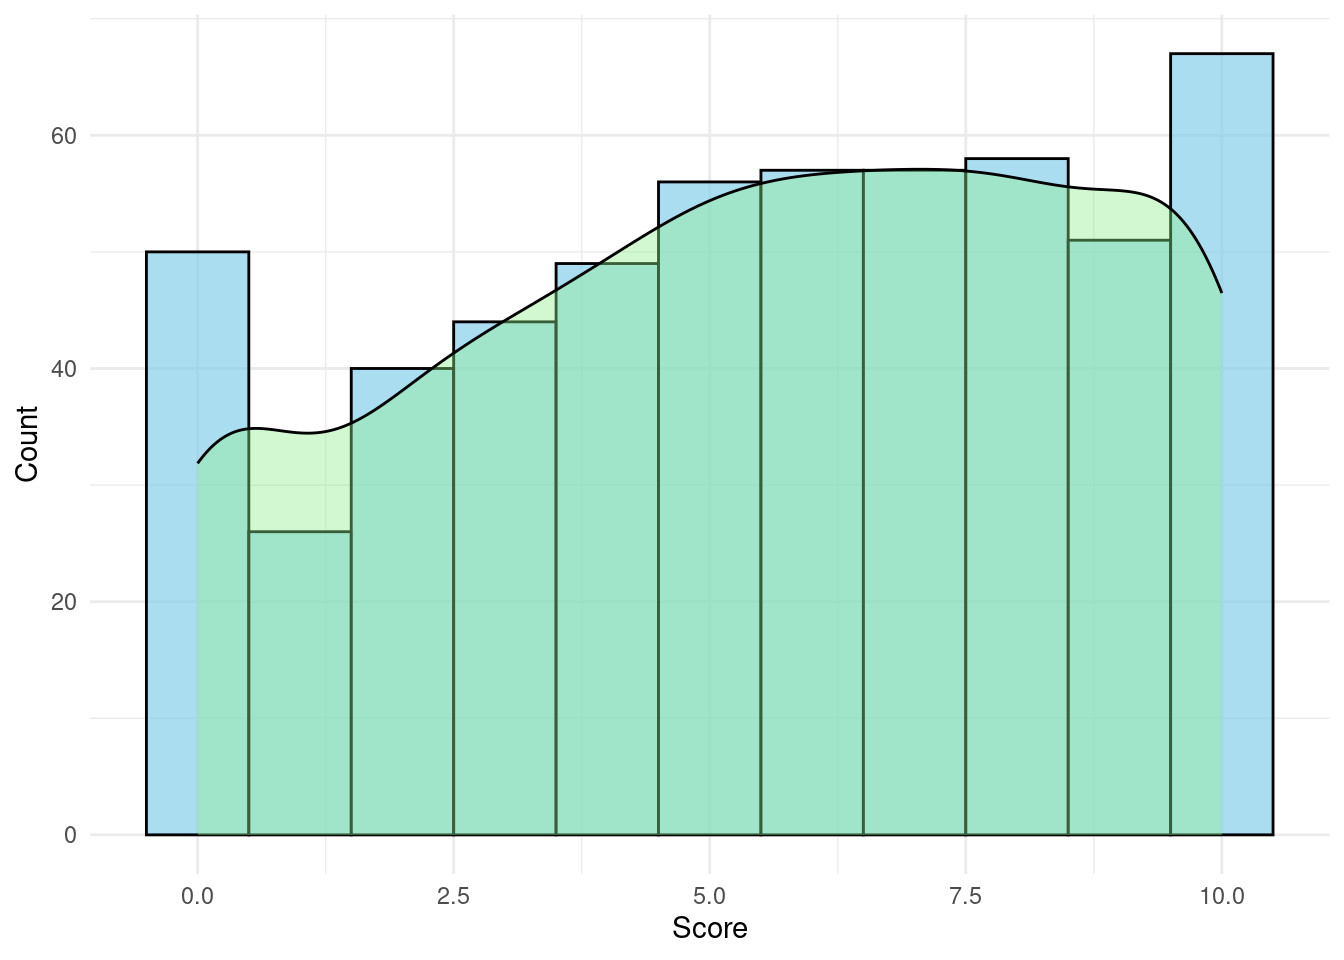</p>
</div>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb2"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb2-1"><a href="#cb2-1" aria-hidden="true" tabindex="-1"></a><span class="fu">ggplot</span>(data_task1, <span class="fu">aes</span>(<span class="at">x =</span> prompt, <span class="at">y =</span> score, <span class="at">fill =</span> prompt)) <span class="sc">+</span></span>
<span id="cb2-2"><a href="#cb2-2" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_violin</span>() <span class="sc">+</span></span>
<span id="cb2-3"><a href="#cb2-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_hline</span>(<span class="at">yintercept =</span> <span class="dv">5</span>, <span class="at">color =</span> <span class="st">&quot;red&quot;</span>, <span class="at">linetype =</span> <span class="st">&quot;dashed&quot;</span>, <span class="at">linewidth =</span> <span class="dv">1</span>) <span class="sc">+</span></span>
<span id="cb2-4"><a href="#cb2-4" aria-hidden="true" tabindex="-1"></a>  <span class="fu">labs</span>(</span>
<span id="cb2-5"><a href="#cb2-5" aria-hidden="true" tabindex="-1"></a>    <span class="at">x =</span> <span class="st">&quot;Taste&quot;</span>,</span>
<span id="cb2-6"><a href="#cb2-6" aria-hidden="true" tabindex="-1"></a>    <span class="at">y =</span> <span class="st">&quot;Score&quot;</span></span>
<span id="cb2-7"><a href="#cb2-7" aria-hidden="true" tabindex="-1"></a>  ) <span class="sc">+</span></span>
<span id="cb2-8"><a href="#cb2-8" aria-hidden="true" tabindex="-1"></a>  <span class="fu">scale_fill_brewer</span>(<span class="at">palette =</span> <span class="st">&quot;Set2&quot;</span>) <span class="sc">+</span></span>
<span id="cb2-9"><a href="#cb2-9" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_minimal</span>() <span class="sc">+</span></span>
<span id="cb2-10"><a href="#cb2-10" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme</span>(<span class="at">legend.position =</span> <span class="st">&quot;none&quot;</span>)</span></code></pre></div>
<div class="cell-output-display">
<p>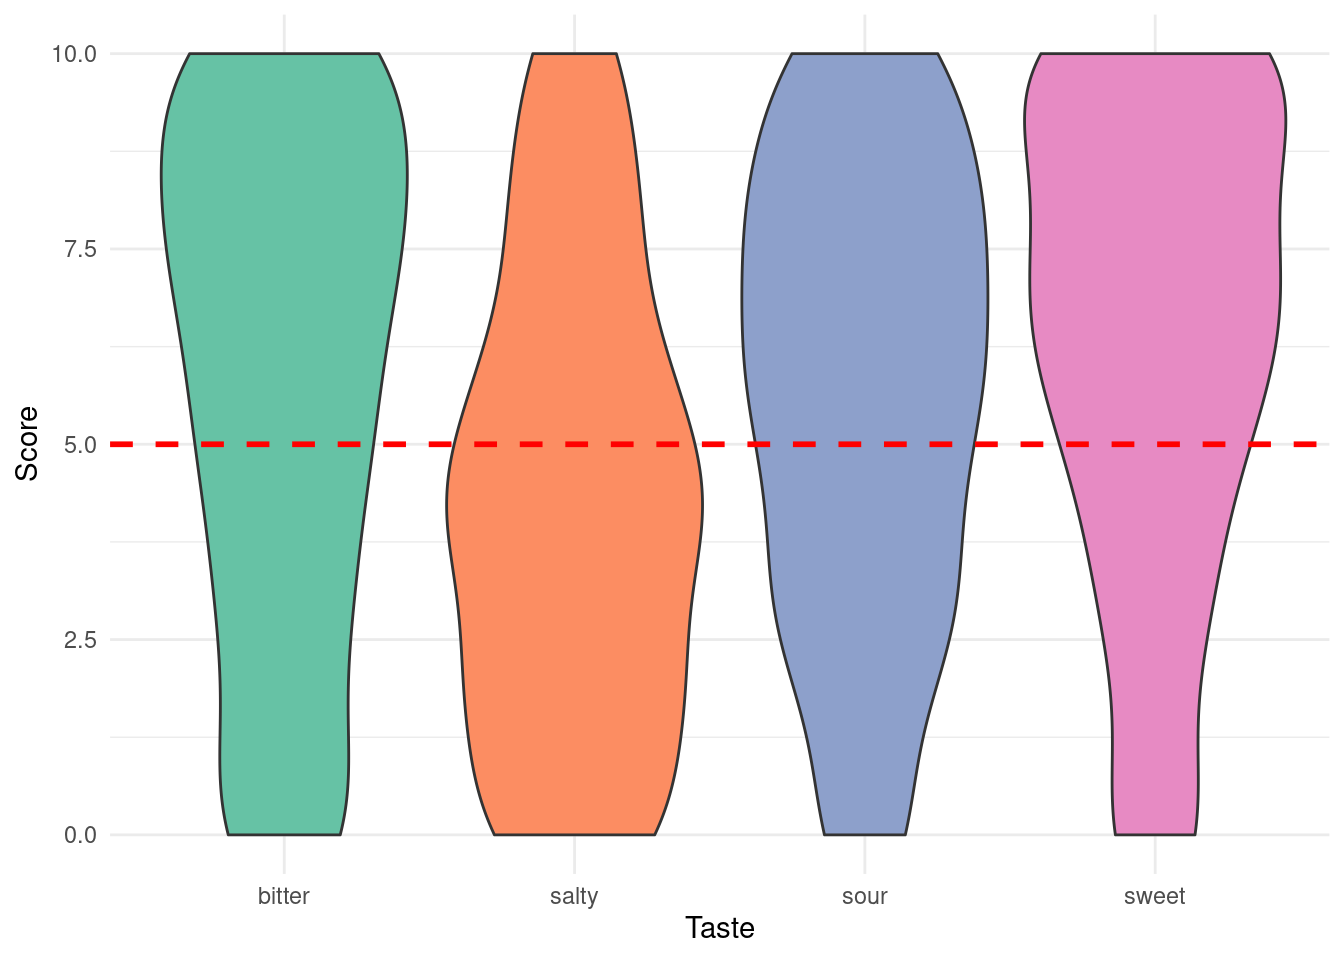</p>
</div>
</div>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="100.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb1"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="co"># Creazione dei grafici per ciascun valore della variabile &#39;prompt&#39;</span></span>
<span id="cb1-2"><a href="#cb1-2" aria-hidden="true" tabindex="-1"></a><span class="fu">ggplot</span>(data_task1, <span class="fu">aes</span>(<span class="at">x =</span> score)) <span class="sc">+</span></span>
<span id="cb1-3"><a href="#cb1-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_histogram</span>(<span class="at">binwidth =</span> <span class="dv">1</span>, <span class="at">fill =</span> <span class="st">&quot;skyblue&quot;</span>, <span class="at">color =</span> <span class="st">&quot;black&quot;</span>, <span class="at">alpha =</span> <span class="fl">0.7</span>) <span class="sc">+</span></span>
<span id="cb1-4"><a href="#cb1-4" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_density</span>(<span class="fu">aes</span>(<span class="at">y =</span> <span class="fu">after_stat</span>(count)), <span class="at">fill =</span> <span class="st">&quot;lightgreen&quot;</span>, <span class="at">alpha =</span> <span class="fl">0.4</span>) <span class="sc">+</span></span>
<span id="cb1-5"><a href="#cb1-5" aria-hidden="true" tabindex="-1"></a>  <span class="fu">labs</span>(<span class="at">x =</span> <span class="st">&quot;Score&quot;</span>, <span class="at">y =</span> <span class="st">&quot;Count&quot;</span>) <span class="sc">+</span></span>
<span id="cb1-6"><a href="#cb1-6" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_minimal</span>() <span class="sc">+</span></span>
<span id="cb1-7"><a href="#cb1-7" aria-hidden="true" tabindex="-1"></a>  <span class="fu">facet_wrap</span>(<span class="sc">~</span> prompt, <span class="at">scales =</span> <span class="st">&quot;free_y&quot;</span>)</span></code></pre></div>
<div class="cell-output-display">
<p>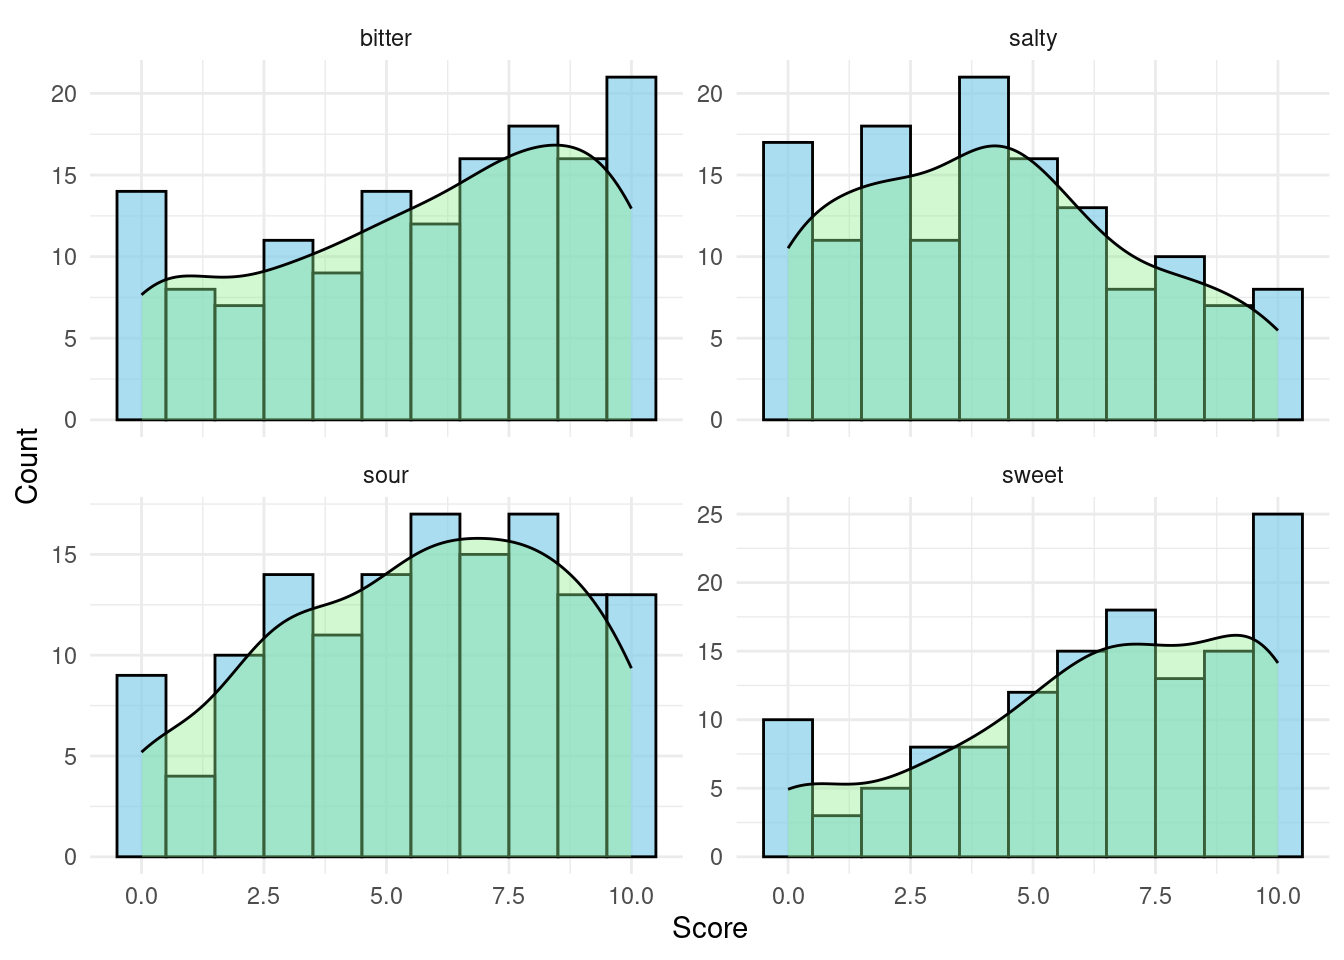</p>
</div>
</div>
</div></td>
</tr>
</tbody>
</table>

Score distribution between the two models.

@fig-model-pref-2 goes further by breaking down the preferences based on the taste category described in the audio sample. Each taste category is visualized using boxplots, where the median score for each taste can be assessed. This enables us to examine whether the model preference varies depending on the taste label, with the red dashed line at a score of 5 acting as the neutral threshold.

### Hypothesis Testing

Next, we assess whether the average score for the audio samples significantly differs from a neutral score of 5, under the assumption that the preference for the fine-tuned model should be greater than this threshold. To do this, we need to verify whether the data follows a normal distribution. In order to assess normality of data we applied both visual and computational methods, then firstly a Q-Q plot was generated to visually inspect the normality of the score distribution, see @fig-qqplot. The resulting plot shows deviations from the expected straight line, indicating that the scores do not follow a normal distribution.

[1] A full description of the model and its finetuning process is available at the publication related to this analysis.


Caricamento pacchetto: 'qqplotr'

I seguenti oggetti sono mascherati da 'package:ggplot2':

    stat_qq_line, StatQqLine

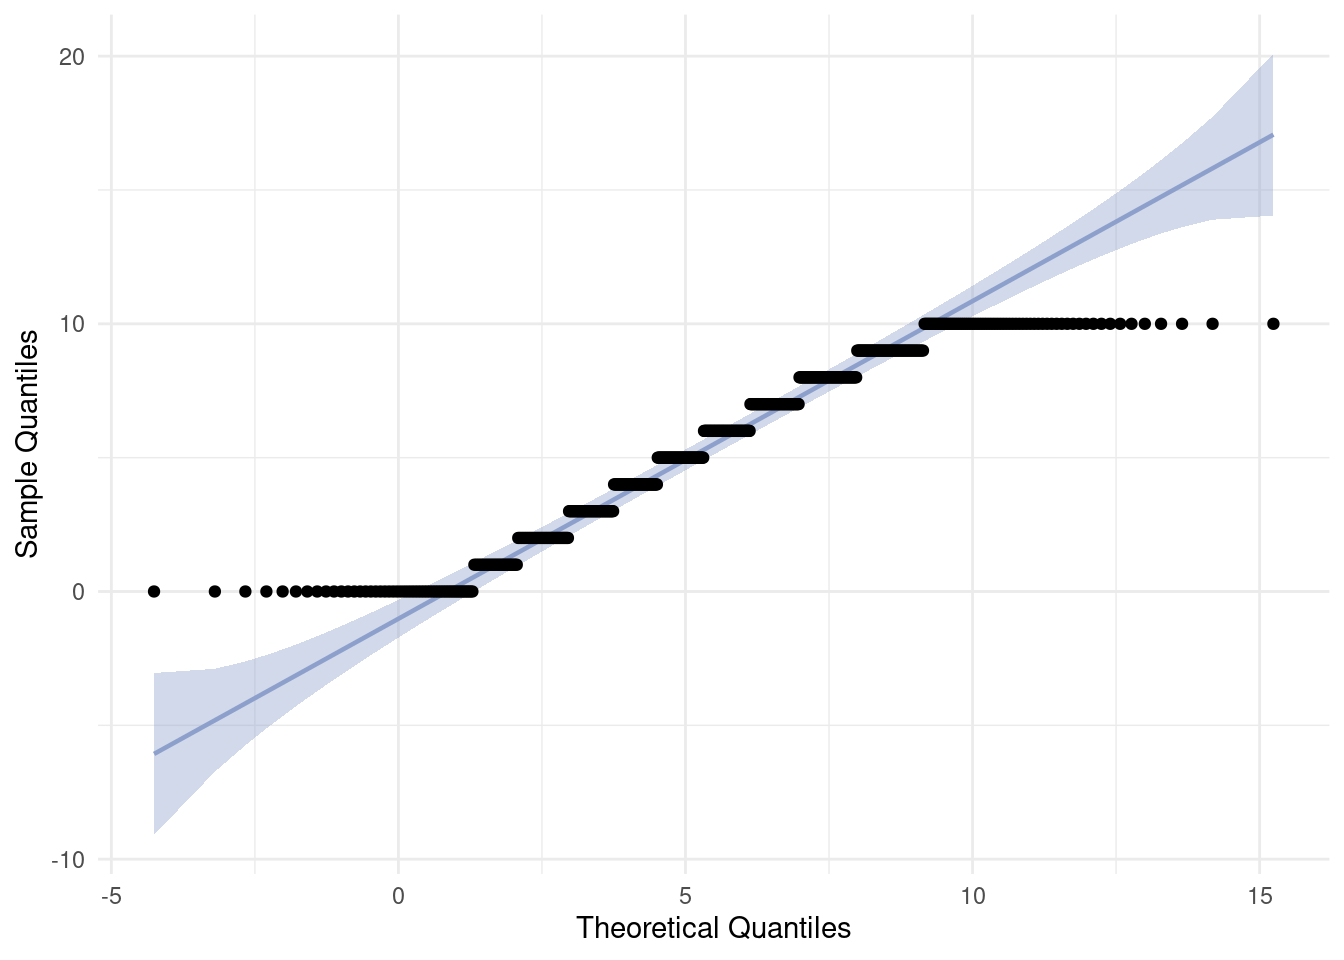

In [ ]:
library(qqplotr)

In [ ]:
# Test Shapiro-Wilk
shapiro.pvalue <- (shapiro.test(data_task1$score))$p.value

In addition the Shapiro-Wilk test confirmed that the data significantly deviate from a normal distribution (with a resulting $p$-value equals to $2.516\times 10^{-14}$). Therefore, we decide to apply the non-parametric Wilcoxon signed-rank test to see if the models preference score expressed by participants has a mean major than the null preference (score equals to five), more formally we are testing the hypothesis:

$$
H_0: \mu = 5 \quad H_1: \mu > 5
$$ where $H_0$ means that there is no preference between the two models while $H_1$ means that the fine-tuned model is preferred over the other one with a $95%$ confidence interval.

In [ ]:
alpha <- 0.05
hyp_mu <- 5

wilcox.pvalue <- (wilcox.test(data_task1$score, mu = hyp_mu, alternative = "greater", conf.level = 1-alpha))$p.value

The result of the Wilcoxon test shows a $p$-value of $1.498\times 10^{-4}$, which is less than $0.05$, indicating that we can reject the null hypothesis and conclude that the median score is indeed significantly greater than $5$. This supports the hypothesis that the participants prefer the fine-tuned model overall.

### Post-Hoc Analysis by Taste

While the Wilcoxon test confirms that the overall preference goes to the fine-tuned model the boxplots reveal a variation of the score by taste, to confirm the variation we perform separate Wilcoxon tests for each taste group (*sweet*, *sour*, *bitter*, *salty*). We use a Bonferroni correction to adjust for the multiple comparisons and control the family-wise error rate. The results of the post-hoc tests are shown below, in @tbl-wilcoxon-taste.

In [ ]:
library(knitr)

levels_taste <- unique(data_task1$prompt)

# List to stpre the results
test_results <- list()

# Execute the Wicoxon test for each category
for (level in levels_taste) {
  # Filter data
  subset_data <- data_task1[data_task1$prompt == level, ]

  test_result <- wilcox.test(subset_data$score, mu = 5, alternative = "greater", conf.level = 1 - alpha)

  # Add the category result
  test_results[[level]] <- test_result
}

# extract the pvalues
p_values <- sapply(test_results, function(res) res$p.value)

# apply the Bonferroni correction
adjusted_p_values <- p.adjust(p_values, method = "bonferroni")

# Visualizza i risultati con i p-value corretti
result_table <- data.frame(
  Taste = names(test_results),
  p.value = p_values,
  adjusted.p.value = adjusted_p_values
) |> select(c("p.value", "adjusted.p.value"))

kable(result_table)

               p.value   adjusted.p.value
  -------- ----------- ------------------
  bitter     0.0034381          0.0137523
  salty      0.9969070          1.0000000
  sour       0.0076040          0.0304159
  sweet      0.0000043          0.0000171


The analysis reveals that the fine-tuned model was significantly preferred for the sweet taste category, with an adjusted $p$-value of $1.7060421\times 10^{-5}$, well below the conventional threshold of $0.05$. This suggests a strong alignment between the musical outputs and participants’ expectations of sweetness. Conversely, the bitter and sour categories also exhibited significant preferences, with adjusted $p$-values of $0.0137523$ and $0.0304159$, respectively. However, these results, while statistically significant, indicate a less robust preference compared to the sweet category. Notably, the salty taste group did not demonstrate a significant preference for the fine-tuned model, as indicated by an adjusted $p$-value near to 1. This lack of significance suggests that the model’s performance may not align with participants’ expectations for salty flavors, warranting further investigation into the underlying factors influencing this outcome.

In [ ]:
subset_data <- data_task1[data_task1$prompt == "salty", ]
salty_base <- wilcox.test(subset_data$score, mu = 5, alternative = "less", conf.level =1 - alpha)$p.value

Since the finetuned model did not show to perform well on the salty group, we performed a Wilcoxon test to test if its mean is significally lower than the tie situation ($H_0: \mu_{\text{salty}} = 5, H_1: \mu_{\text{salty}} < 5$) the result is that the first model is statistically preferred over the finetuned variant according to the Wilcoxon test with a $p$-value equal to $0.0031167$ without Bonferroni correction[1].

## Recognisability of Tastes

In the second task of the survey, participants were asked to listen to musical pieces generated exclusively by the fine-tuned model to better investigate the intrinsic qualities carried by the generated music. Following each listening session, participants were required to quantify the flavors they perceived in the music using a graduated scale, ranging from 1 to 5 (where 1 means *not at all* and 5 means *very much*), for each of the four primary taste categories: salty, sweet, bitter, and sour. Unlike the first task, there were no imposed labels for specific flavors, allowing participants the freedom to associate values with each taste based on their personal interpretations of the musical experience. Additionally, to enrich the assessment, participants had to evaluate their emotional responses to the music by rating various non-gustatory parameters, including happiness, sadness, anger, disgust, fear, surprise, hot, and cold. @fig-task2 displays the web interface used to collect participants’ responses.

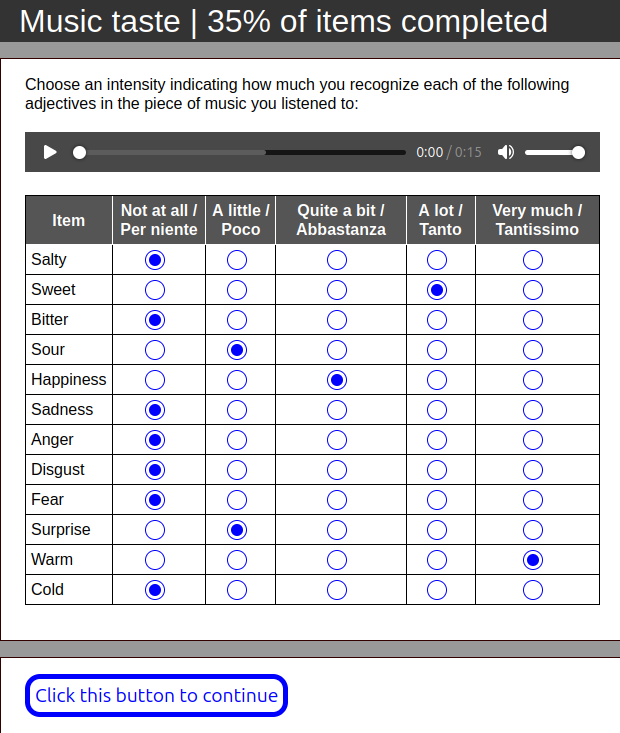{#fig-task2 .lightbox }

The underlying research questions guiding this task were:

1.  Can the music generated by the model induce sensory-gustatory responses?
2.  What correlations exist between music and taste?
3.  Which emotions mediate these sensory responses?

### ANOVA test

To address the first research question, we performed an Analysis of Variance (ANOVA) to evaluate whether the participants’ ratings of stimuli varied according to distinct stimulus characteristics. The dependent variable was the value assigned by participants to each stimulus, while the independent variables included stimulus-related factors. The dataset was filtered to include only participants identifying as *Male* or *Female*, excluding participants classified as *Professional Eaters* due to insufficient representation of this category. This preprocessing step ensured robust and meaningful comparisons between groups.

[1] The Bonferroni correction has not been applied due to the non indepenent nature of the test, in fact the test has been performed after the results of the previous Wilcoxon test, which, instead, was testing independently 4 groups.

In [ ]:
library(broom)

df <- data_aov |>
  filter(sex == "Male" | sex == "Female") |>  # too few people recognize themself as non male/female
  filter(eating_experience != "Professional") # the only professional eater is filtered out

res <- aov(value ~ prompt * adjective + hearing_experience + eating_experience + sex, data = df)
kable(tidy(res), digits = c(0, 0, 3, 3, 3, 3),
      col.names = c("", "Df", "Sum Sq", "Mean Sq", "F value", "Pr(>F)"))

                           Df     Sum Sq   Mean Sq   F value   Pr(\>F)
  -------------------- ------ ---------- --------- --------- ---------
  prompt                    3     29.402     9.801     8.739     0.000
  adjective                11    188.478    17.134    15.279     0.000
  hearing_experience        2     37.299    18.650    16.630     0.000
  eating_experience         1      0.711     0.711     0.634     0.426
  sex                       1      0.069     0.069     0.061     0.804
  prompt:adjective         33    214.757     6.508     5.803     0.000
  Residuals              3764   4221.057     1.121        NA        NA


The results of the ANOVA are summarized in @tbl-anova-value, which presents the degrees of freedom (Df), sum of squares (Sum Sq), mean squares (Mean Sq), F-statistics, and $p$-values for each factor and interaction.

Prior to interpreting the results, the homoskedasticity assumption was assessed by examining the residuals. A Shapiro-Wilk test indicated evidence of heteroskedasticity ($p < 0.05$). Despite this violation, the ANOVA analysis proceeded, following recommendations from prior research \[@glass_1972_consequences_of_failure; @harwell_1992_meta-analytic_methods; @lix_1996_presence_of_variance\] suggesting that ANOVA is robust to deviations from normality under moderate violations, particularly with large sample sizes such as the one in this study. The results show that different prompts and adjectives lead to significantly different adjectives quantified by participants, similarly the adjectives used influence the participants’ feelings. Furthermore the significant interaction effect implies that the effect of one variable depends on the level of the other. In other words, the way a prompt influences feelings may vary depending on the adjective used. This result highlights that the participants to the survey deliberately operated consistent choices while evaluating the stimuli.

### Post-Hoc Analysis

To further explore the results of the ANOVA, we conducted Tukey’s Honest Significant Difference (HSD) test. This post-hoc analysis is particularly useful for identifying which specific group means are significantly different from each other after finding a significant overall effect in the ANOVA. Given that our analysis revealed significant main effects for prompt, adjective, their interaction and the hearing experience, it is essential to determine the nature of these differences.

The Tukey test compares all possible pairs of group means while controlling for the family-wise error rate, thus providing a robust method for multiple comparisons. This is crucial in our context, as we aim to understand how different prompts, adjectives and hearing experience levels influence participants’ evaluations of the stimuli. Upon executing the Tukey test, we examined the adjusted $p$-values for each comparison. The results indicated several significant differences between specific combinations of prompts and adjectives, as summarized in the table below:

In [ ]:
res <- aov(value ~ prompt + adjective + hearing_experience, data = data_aov)
tukey <- TukeyHSD(res)

# For each Tukey result, filter where p adj is less than 0.05
significant_prompts <- as.data.frame(tukey$prompt) |> filter(`p adj` < 0.05)
significant_adjectives <- as.data.frame(tukey$adjective) |> filter(`p adj` < 0.05)
significant_hearing_experience <- as.data.frame(tukey$hearing_experience) |> filter(`p adj` < 0.05)

In [ ]:
kable(significant_prompts)

                        diff          lwr          upr       p adj
  ------------- ------------ ------------ ------------ -----------
  sour-bitter      0.1539030    0.0274663    0.2803397   0.0095792
  sour-salty       0.1942878    0.0661296    0.3224460   0.0005747
  sweet-sour      -0.1932957   -0.3214540   -0.0651375   0.0006229

  : Tukey test between different prompts with a $p$-value lower 0.05.


In [ ]:
kable(significant_adjectives)

                             diff          lwr          upr       p adj
  ------------------ ------------ ------------ ------------ -----------
  bitter-anger          0.4204204    0.1439129    0.6969280   0.0000443
  cold-anger            0.4774775    0.2009699    0.7539850   0.0000012
  hot-anger             0.5315315    0.2550240    0.8080391   0.0000000
  sad-anger             0.5765766    0.3000690    0.8530841   0.0000000
  sweet-anger           0.3723724    0.0958648    0.6488799   0.0006699
  disgust-bitter       -0.6336336   -0.9101412   -0.3571261   0.0000000
  happy-bitter         -0.3093093   -0.5858169   -0.0328018   0.0136899
  surprise-bitter      -0.2852853   -0.5617928   -0.0087777   0.0360645
  disgust-cold         -0.6906907   -0.9671982   -0.4141831   0.0000000
  happy-cold           -0.3663664   -0.6428739   -0.0898588   0.0009180
  sour-cold            -0.2852853   -0.5617928   -0.0087777   0.0360645
  surprise-cold        -0.3423423   -0.6188499   -0.0658348   0.0030580
  fear-disgust          0.4324324    0.1559249    0.7089400   0.0000213
  happy-disgust         0.3243243    0.0478168    0.6008319   0.0070884
  hot-disgust           0.7447447    0.4682372    1.0212523   0.0000000
  sad-disgust           0.7897898    0.5132822    1.0662973   0.0000000
  salty-disgust         0.4684685    0.1919609    0.7449760   0.0000021
  sour-disgust          0.4054054    0.1288979    0.6819130   0.0001074
  surprise-disgust      0.3483483    0.0718408    0.6248559   0.0022833
  sweet-disgust         0.5855856    0.3090780    0.8620931   0.0000000
  hot-fear              0.3123123    0.0358048    0.5888199   0.0120394
  sad-fear              0.3573574    0.0808498    0.6338649   0.0014571
  hot-happy             0.4204204    0.1439129    0.6969280   0.0000443
  sad-happy             0.4654655    0.1889579    0.7419730   0.0000026
  sour-hot             -0.3393393   -0.6158469   -0.0628318   0.0035312
  surprise-hot         -0.3963964   -0.6729040   -0.1198888   0.0001798
  salty-sad            -0.3213213   -0.5978289   -0.0448138   0.0081111
  sour-sad             -0.3843844   -0.6608919   -0.1078768   0.0003509
  surprise-sad         -0.4414414   -0.7179490   -0.1649339   0.0000122

  : Tukey test between different adjectives with a $p$-value lower 0.05.


In [ ]:
kable(significant_hearing_experience)

  ----------------------------------------------------------------------------
                                    diff          lwr          upr       p adj
  ------------------------- ------------ ------------ ------------ -----------
  Amateur-Professional         0.2268160    0.1318865    0.3217454   0.0000001

  Not-experienced-Amateur     -0.1684003   -0.2698267   -0.0669739   0.0002967
  ----------------------------------------------------------------------------

  : Tukey test between different hearing experience groups with a
  $p$-value lower 0.05.


These significant comparisons illuminate the subtleties in participants’ responses to different stimuli. Certain prompt-adjective combinations elicited stronger emotional reactions than others, indicating that the interaction between prompts and adjectives significantly shapes participants’ perceptions. Notably, some combinations yielded adjusted $p$-values below the conventional threshold of $0.05$, signifying statistically significant differences. This finding reinforces the ANOVA results, confirming that the presentation of prompts and adjectives can meaningfully impact emotional responses.

### Interaction between *prompt* and *adjective*

The ANOVA analysis evidenced also a significant interaction between prompt and adjectives used to evaluate the sounds, as we know, the design of the experiment fixed the prompt before generating the audio files, therefore adjectives has to be intended as dependent variables while the prompts are independent; in other words, participants assigned different values to the adjectives to the sounds on the basis of their generation prompt. This interaction can be seen in @fig-heatmap. In particular @fig-heatmap-taste shows the mean value assigned to each taste adjective by their prompt, we can clearly seen the major diagonal emerge by the $4 \times 4$ matrix, this means that, the mean value assigned to the adjective that matches the prompt of each sound is the highest. The rest of the interaction between adjectives and prompt can be seen in @fig-heatmap-emotions , a deeper analysis of emotional aspect assigned to the sounds is presented in the next section.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb1"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="fu">library</span>(reshape2)</span></code></pre></div>
<div class="cell-output cell-output-stderr">
<pre><code>
Caricamento pacchetto: &#39;reshape2&#39;</code></pre>
</div>
<div class="cell-output cell-output-stderr">
<pre><code>Il seguente oggetto è mascherato da &#39;package:tidyr&#39;:
&#10;    smiths</code></pre>
</div>
<div class="sourceCode" id="cb4"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb4-1"><a href="#cb4-1" aria-hidden="true" tabindex="-1"></a><span class="co"># Calcolo della media per ciascun prompt</span></span>
<span id="cb4-2"><a href="#cb4-2" aria-hidden="true" tabindex="-1"></a>heatmap_data <span class="ot">&lt;-</span> data_task2 <span class="sc">|&gt;</span></span>
<span id="cb4-3"><a href="#cb4-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">group_by</span>(prompt) <span class="sc">|&gt;</span></span>
<span id="cb4-4"><a href="#cb4-4" aria-hidden="true" tabindex="-1"></a>  <span class="fu">summarise</span>(</span>
<span id="cb4-5"><a href="#cb4-5" aria-hidden="true" tabindex="-1"></a>    <span class="at">sour =</span> <span class="fu">mean</span>(sour, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb4-6"><a href="#cb4-6" aria-hidden="true" tabindex="-1"></a>    <span class="at">sweet =</span> <span class="fu">mean</span>(sweet, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb4-7"><a href="#cb4-7" aria-hidden="true" tabindex="-1"></a>    <span class="at">bitter =</span> <span class="fu">mean</span>(bitter, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb4-8"><a href="#cb4-8" aria-hidden="true" tabindex="-1"></a>    <span class="at">salty =</span> <span class="fu">mean</span>(salty, <span class="at">na.rm =</span> <span class="cn">TRUE</span>)</span>
<span id="cb4-9"><a href="#cb4-9" aria-hidden="true" tabindex="-1"></a>  )</span>
<span id="cb4-10"><a href="#cb4-10" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb4-11"><a href="#cb4-11" aria-hidden="true" tabindex="-1"></a><span class="co"># Riorganizzazione per la heatmap</span></span>
<span id="cb4-12"><a href="#cb4-12" aria-hidden="true" tabindex="-1"></a>heatmap_matrix <span class="ot">&lt;-</span> heatmap_data <span class="sc">|&gt;</span></span>
<span id="cb4-13"><a href="#cb4-13" aria-hidden="true" tabindex="-1"></a>  <span class="fu">pivot_longer</span>(<span class="at">cols =</span> <span class="sc">-</span>prompt, <span class="at">names_to =</span> <span class="st">&quot;adjective&quot;</span>, <span class="at">values_to =</span> <span class="st">&quot;mean_value&quot;</span>) <span class="sc">|&gt;</span></span>
<span id="cb4-14"><a href="#cb4-14" aria-hidden="true" tabindex="-1"></a>  <span class="fu">pivot_wider</span>(<span class="at">names_from =</span> adjective, <span class="at">values_from =</span> mean_value) <span class="sc">|&gt;</span></span>
<span id="cb4-15"><a href="#cb4-15" aria-hidden="true" tabindex="-1"></a>  <span class="fu">column_to_rownames</span>(<span class="st">&quot;prompt&quot;</span>) <span class="sc">|&gt;</span></span>
<span id="cb4-16"><a href="#cb4-16" aria-hidden="true" tabindex="-1"></a>  <span class="fu">as.matrix</span>()</span>
<span id="cb4-17"><a href="#cb4-17" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb4-18"><a href="#cb4-18" aria-hidden="true" tabindex="-1"></a>axis_order <span class="ot">&lt;-</span> <span class="fu">c</span>(<span class="st">&quot;bitter&quot;</span>, <span class="st">&quot;salty&quot;</span>, <span class="st">&quot;sour&quot;</span>, <span class="st">&quot;sweet&quot;</span>)</span>
<span id="cb4-19"><a href="#cb4-19" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb4-20"><a href="#cb4-20" aria-hidden="true" tabindex="-1"></a><span class="co"># Creazione della heatmap con ggplot2</span></span>
<span id="cb4-21"><a href="#cb4-21" aria-hidden="true" tabindex="-1"></a>heatmap_plot <span class="ot">&lt;-</span> heatmap_data <span class="sc">|&gt;</span></span>
<span id="cb4-22"><a href="#cb4-22" aria-hidden="true" tabindex="-1"></a>  <span class="fu">pivot_longer</span>(<span class="at">cols =</span> <span class="sc">-</span>prompt, <span class="at">names_to =</span> <span class="st">&quot;adjective&quot;</span>, <span class="at">values_to =</span> <span class="st">&quot;mean_value&quot;</span>) <span class="sc">|&gt;</span></span>
<span id="cb4-23"><a href="#cb4-23" aria-hidden="true" tabindex="-1"></a>  <span class="fu">mutate</span>(</span>
<span id="cb4-24"><a href="#cb4-24" aria-hidden="true" tabindex="-1"></a>    <span class="at">prompt =</span> <span class="fu">factor</span>(prompt, <span class="at">levels =</span> <span class="fu">rev</span>(axis_order)),</span>
<span id="cb4-25"><a href="#cb4-25" aria-hidden="true" tabindex="-1"></a>    <span class="at">adjective =</span> <span class="fu">factor</span>(adjective, <span class="at">levels =</span> axis_order)</span>
<span id="cb4-26"><a href="#cb4-26" aria-hidden="true" tabindex="-1"></a>  ) <span class="sc">|&gt;</span></span>
<span id="cb4-27"><a href="#cb4-27" aria-hidden="true" tabindex="-1"></a>  <span class="fu">ggplot</span>(<span class="fu">aes</span>(<span class="at">x =</span> adjective, <span class="at">y =</span> prompt, <span class="at">fill =</span> mean_value)) <span class="sc">+</span></span>
<span id="cb4-28"><a href="#cb4-28" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_tile</span>() <span class="sc">+</span></span>
<span id="cb4-29"><a href="#cb4-29" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_text</span>(<span class="fu">aes</span>(<span class="at">label =</span> <span class="fu">round</span>(mean_value, <span class="dv">2</span>)), <span class="at">color =</span> <span class="st">&quot;black&quot;</span>, <span class="at">size =</span> <span class="dv">4</span>) <span class="sc">+</span></span>
<span id="cb4-30"><a href="#cb4-30" aria-hidden="true" tabindex="-1"></a>  <span class="fu">scale_fill_gradient</span>(<span class="at">low =</span> <span class="st">&quot;white&quot;</span>, <span class="at">high =</span> <span class="st">&quot;blue&quot;</span>) <span class="sc">+</span></span>
<span id="cb4-31"><a href="#cb4-31" aria-hidden="true" tabindex="-1"></a>  <span class="fu">labs</span>(</span>
<span id="cb4-32"><a href="#cb4-32" aria-hidden="true" tabindex="-1"></a>    <span class="at">x =</span> <span class="st">&quot;Adjective&quot;</span>,</span>
<span id="cb4-33"><a href="#cb4-33" aria-hidden="true" tabindex="-1"></a>    <span class="at">y =</span> <span class="st">&quot;Prompt&quot;</span>,</span>
<span id="cb4-34"><a href="#cb4-34" aria-hidden="true" tabindex="-1"></a>    <span class="at">fill =</span> <span class="st">&quot;Mean value&quot;</span></span>
<span id="cb4-35"><a href="#cb4-35" aria-hidden="true" tabindex="-1"></a>  ) <span class="sc">+</span></span>
<span id="cb4-36"><a href="#cb4-36" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_minimal</span>() <span class="sc">+</span></span>
<span id="cb4-37"><a href="#cb4-37" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme</span>(<span class="at">axis.text.x =</span> <span class="fu">element_text</span>(<span class="at">angle =</span> <span class="dv">45</span>, <span class="at">hjust =</span> <span class="dv">1</span>))</span>
<span id="cb4-38"><a href="#cb4-38" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb4-39"><a href="#cb4-39" aria-hidden="true" tabindex="-1"></a><span class="co"># Mostrare il grafico</span></span>
<span id="cb4-40"><a href="#cb4-40" aria-hidden="true" tabindex="-1"></a><span class="fu">print</span>(heatmap_plot)</span></code></pre></div>
<div class="cell-output-display">
<p>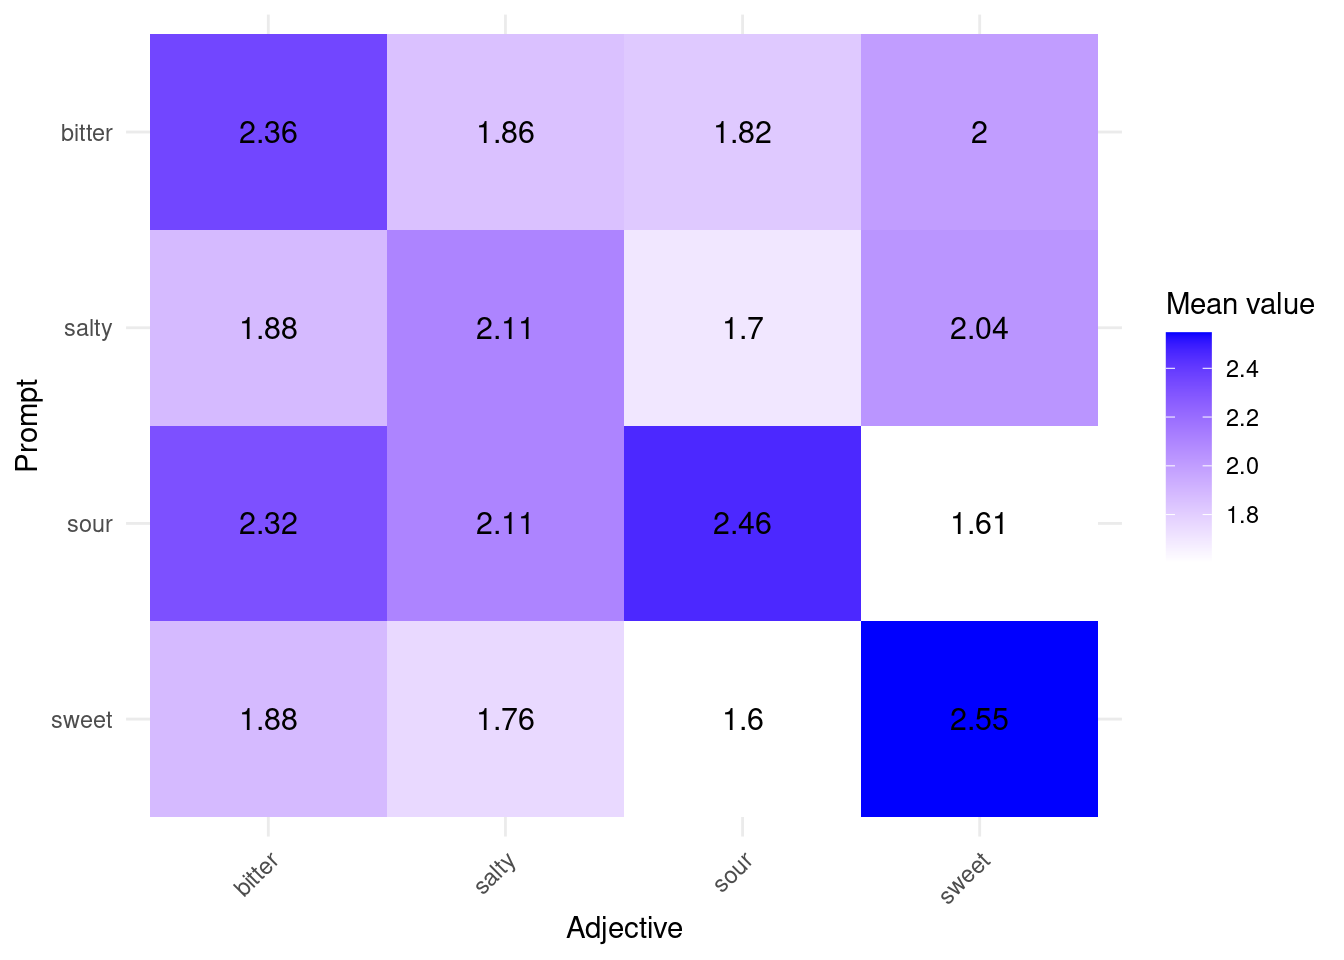</p>
</div>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb5"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb5-1"><a href="#cb5-1" aria-hidden="true" tabindex="-1"></a><span class="co"># Calcolo della media per ciascun prompt</span></span>
<span id="cb5-2"><a href="#cb5-2" aria-hidden="true" tabindex="-1"></a>heatmap_data <span class="ot">&lt;-</span> data_task2 <span class="sc">|&gt;</span></span>
<span id="cb5-3"><a href="#cb5-3" aria-hidden="true" tabindex="-1"></a>  <span class="fu">group_by</span>(prompt) <span class="sc">|&gt;</span></span>
<span id="cb5-4"><a href="#cb5-4" aria-hidden="true" tabindex="-1"></a>  <span class="fu">summarise</span>(</span>
<span id="cb5-5"><a href="#cb5-5" aria-hidden="true" tabindex="-1"></a>    <span class="at">happy =</span> <span class="fu">mean</span>(happy, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb5-6"><a href="#cb5-6" aria-hidden="true" tabindex="-1"></a>    <span class="at">sad =</span> <span class="fu">mean</span>(sad, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb5-7"><a href="#cb5-7" aria-hidden="true" tabindex="-1"></a>    <span class="at">anger =</span> <span class="fu">mean</span>(anger, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb5-8"><a href="#cb5-8" aria-hidden="true" tabindex="-1"></a>    <span class="at">disgust =</span> <span class="fu">mean</span>(disgust, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb5-9"><a href="#cb5-9" aria-hidden="true" tabindex="-1"></a>    <span class="at">fear =</span> <span class="fu">mean</span>(fear, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb5-10"><a href="#cb5-10" aria-hidden="true" tabindex="-1"></a>    <span class="at">surprise =</span> <span class="fu">mean</span>(surprise, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb5-11"><a href="#cb5-11" aria-hidden="true" tabindex="-1"></a>    <span class="at">hot =</span> <span class="fu">mean</span>(hot, <span class="at">na.rm =</span> <span class="cn">TRUE</span>),</span>
<span id="cb5-12"><a href="#cb5-12" aria-hidden="true" tabindex="-1"></a>    <span class="at">cold =</span> <span class="fu">mean</span>(cold, <span class="at">na.rm =</span> <span class="cn">TRUE</span>)</span>
<span id="cb5-13"><a href="#cb5-13" aria-hidden="true" tabindex="-1"></a>  )</span>
<span id="cb5-14"><a href="#cb5-14" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb5-15"><a href="#cb5-15" aria-hidden="true" tabindex="-1"></a><span class="co"># Riorganizzazione per la heatmap</span></span>
<span id="cb5-16"><a href="#cb5-16" aria-hidden="true" tabindex="-1"></a>heatmap_matrix <span class="ot">&lt;-</span> heatmap_data <span class="sc">|&gt;</span></span>
<span id="cb5-17"><a href="#cb5-17" aria-hidden="true" tabindex="-1"></a>  <span class="fu">pivot_longer</span>(<span class="at">cols =</span> <span class="sc">-</span>prompt, <span class="at">names_to =</span> <span class="st">&quot;adjective&quot;</span>, <span class="at">values_to =</span> <span class="st">&quot;mean_value&quot;</span>) <span class="sc">|&gt;</span></span>
<span id="cb5-18"><a href="#cb5-18" aria-hidden="true" tabindex="-1"></a>  <span class="fu">pivot_wider</span>(<span class="at">names_from =</span> adjective, <span class="at">values_from =</span> mean_value) <span class="sc">|&gt;</span></span>
<span id="cb5-19"><a href="#cb5-19" aria-hidden="true" tabindex="-1"></a>  <span class="fu">column_to_rownames</span>(<span class="st">&quot;prompt&quot;</span>) <span class="sc">|&gt;</span></span>
<span id="cb5-20"><a href="#cb5-20" aria-hidden="true" tabindex="-1"></a>  <span class="fu">as.matrix</span>()</span>
<span id="cb5-21"><a href="#cb5-21" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb5-22"><a href="#cb5-22" aria-hidden="true" tabindex="-1"></a><span class="co"># Definire l&#39;ordine degli assi</span></span>
<span id="cb5-23"><a href="#cb5-23" aria-hidden="true" tabindex="-1"></a>axis_order <span class="ot">&lt;-</span> <span class="fu">c</span>(<span class="st">&quot;sad&quot;</span>, <span class="st">&quot;anger&quot;</span>, <span class="st">&quot;disgust&quot;</span>, <span class="st">&quot;fear&quot;</span>, <span class="st">&quot;surprise&quot;</span>, <span class="st">&quot;happy&quot;</span>, <span class="st">&quot;hot&quot;</span>, <span class="st">&quot;cold&quot;</span>)</span>
<span id="cb5-24"><a href="#cb5-24" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb5-25"><a href="#cb5-25" aria-hidden="true" tabindex="-1"></a><span class="co"># Creazione della heatmap con ggplot2</span></span>
<span id="cb5-26"><a href="#cb5-26" aria-hidden="true" tabindex="-1"></a>heatmap_plot <span class="ot">&lt;-</span> heatmap_data <span class="sc">|&gt;</span></span>
<span id="cb5-27"><a href="#cb5-27" aria-hidden="true" tabindex="-1"></a>  <span class="fu">pivot_longer</span>(<span class="at">cols =</span> <span class="sc">-</span>prompt, <span class="at">names_to =</span> <span class="st">&quot;adjective&quot;</span>, <span class="at">values_to =</span> <span class="st">&quot;mean_value&quot;</span>) <span class="sc">|&gt;</span></span>
<span id="cb5-28"><a href="#cb5-28" aria-hidden="true" tabindex="-1"></a>  <span class="fu">mutate</span>(</span>
<span id="cb5-29"><a href="#cb5-29" aria-hidden="true" tabindex="-1"></a>    <span class="at">prompt =</span> <span class="fu">factor</span>(prompt, <span class="at">levels =</span> <span class="fu">rev</span>(<span class="fu">unique</span>(prompt))),</span>
<span id="cb5-30"><a href="#cb5-30" aria-hidden="true" tabindex="-1"></a>    <span class="at">adjective =</span> <span class="fu">factor</span>(adjective, <span class="at">levels =</span> axis_order)</span>
<span id="cb5-31"><a href="#cb5-31" aria-hidden="true" tabindex="-1"></a>  ) <span class="sc">|&gt;</span></span>
<span id="cb5-32"><a href="#cb5-32" aria-hidden="true" tabindex="-1"></a>  <span class="fu">ggplot</span>(<span class="fu">aes</span>(<span class="at">x =</span> adjective, <span class="at">y =</span> prompt, <span class="at">fill =</span> mean_value)) <span class="sc">+</span></span>
<span id="cb5-33"><a href="#cb5-33" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_tile</span>() <span class="sc">+</span></span>
<span id="cb5-34"><a href="#cb5-34" aria-hidden="true" tabindex="-1"></a>  <span class="fu">geom_text</span>(<span class="fu">aes</span>(<span class="at">label =</span> <span class="fu">round</span>(mean_value, <span class="dv">2</span>)), <span class="at">color =</span> <span class="st">&quot;black&quot;</span>, <span class="at">size =</span> <span class="dv">4</span>) <span class="sc">+</span></span>
<span id="cb5-35"><a href="#cb5-35" aria-hidden="true" tabindex="-1"></a>  <span class="fu">scale_fill_gradient</span>(<span class="at">low =</span> <span class="st">&quot;white&quot;</span>, <span class="at">high =</span> <span class="st">&quot;blue&quot;</span>) <span class="sc">+</span></span>
<span id="cb5-36"><a href="#cb5-36" aria-hidden="true" tabindex="-1"></a>  <span class="fu">labs</span>(</span>
<span id="cb5-37"><a href="#cb5-37" aria-hidden="true" tabindex="-1"></a>    <span class="at">x =</span> <span class="st">&quot;Adjective&quot;</span>,</span>
<span id="cb5-38"><a href="#cb5-38" aria-hidden="true" tabindex="-1"></a>    <span class="at">y =</span> <span class="st">&quot;Prompt&quot;</span>,</span>
<span id="cb5-39"><a href="#cb5-39" aria-hidden="true" tabindex="-1"></a>    <span class="at">fill =</span> <span class="st">&quot;Mean Value&quot;</span></span>
<span id="cb5-40"><a href="#cb5-40" aria-hidden="true" tabindex="-1"></a>  ) <span class="sc">+</span></span>
<span id="cb5-41"><a href="#cb5-41" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme_minimal</span>() <span class="sc">+</span></span>
<span id="cb5-42"><a href="#cb5-42" aria-hidden="true" tabindex="-1"></a>  <span class="fu">theme</span>(<span class="at">axis.text.x =</span> <span class="fu">element_text</span>(<span class="at">angle =</span> <span class="dv">45</span>, <span class="at">hjust =</span> <span class="dv">1</span>))</span>
<span id="cb5-43"><a href="#cb5-43" aria-hidden="true" tabindex="-1"></a></span>
<span id="cb5-44"><a href="#cb5-44" aria-hidden="true" tabindex="-1"></a><span class="co"># Mostrare il grafico</span></span>
<span id="cb5-45"><a href="#cb5-45" aria-hidden="true" tabindex="-1"></a><span class="fu">print</span>(heatmap_plot)</span></code></pre></div>
<div class="cell-output-display">
<p>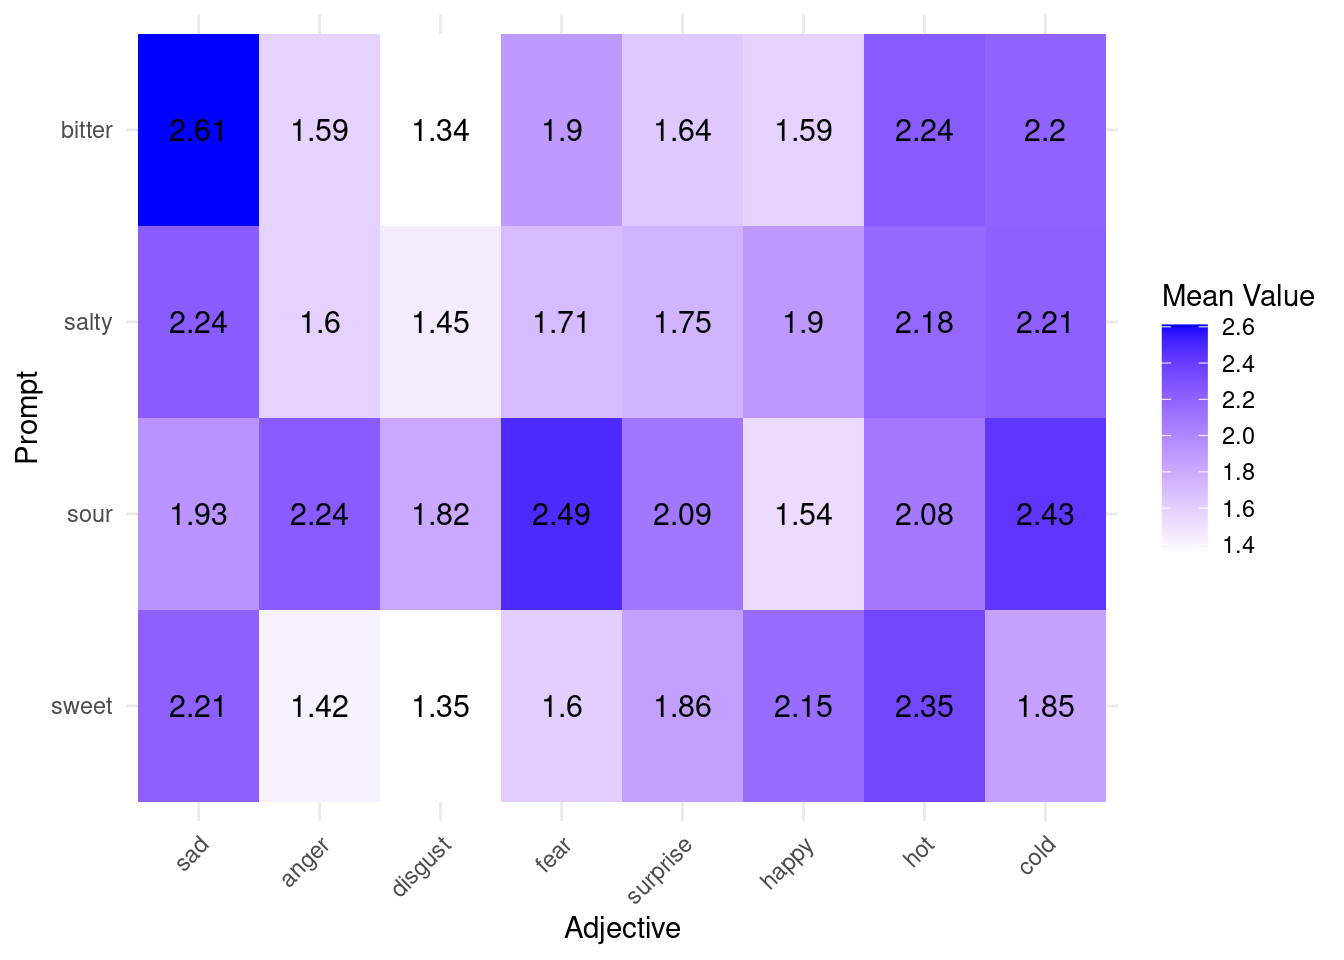</p>
</div>
</div>
</div></td>
</tr>
</tbody>
</table>

Heatmaps

### Factorial analysis

In [ ]:
# Standardize the data excluding the 'taste' column
data <- data_task2 |> select(-prompt)

To explore the underlying relationships between sensory qualities and emotional states, we conducted a factor analysis on the standardized data, excluding the ‘taste’ column. The initial step involved calculating the correlation matrix, which revealed notable relationships among the adjectives. Specifically, we observed that negative emotions were positively correlated, while the pair happy-sad exhibited a negative correlation. Furthermore, sweetness demonstrated a strong correlation with happiness and warmth, whereas bitterness was associated with anger and fear. Sourness, on the other hand, was evidently correlated with disgust and fear. Other variables did not show strong correlations at first glance, prompting us to proceed with the factor analysis.

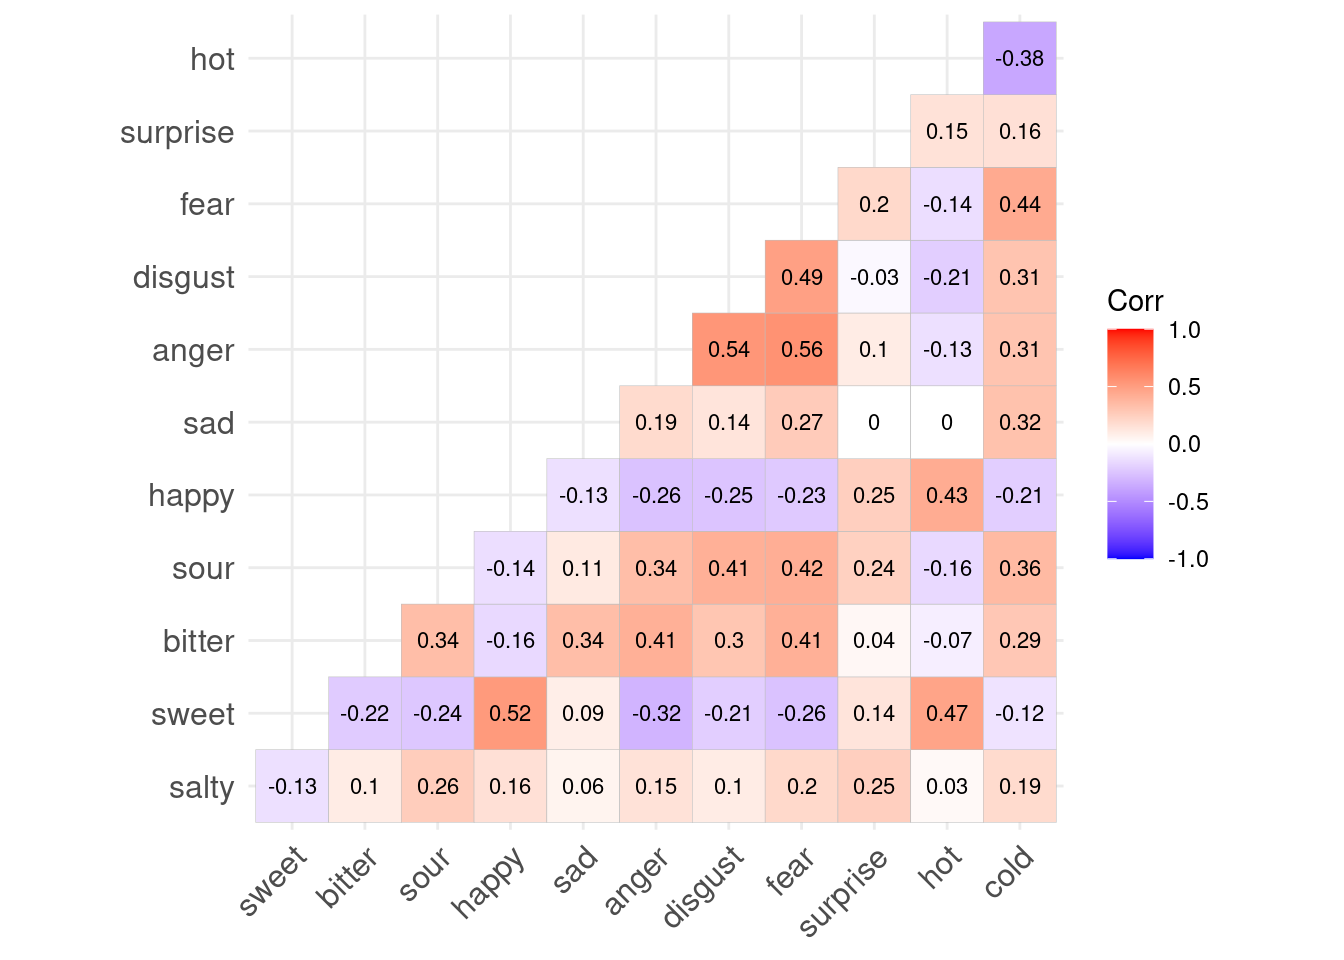

In [ ]:
library("ggcorrplot")

cor_matrix <- cor(data)

ggcorrplot(cor_matrix,
           lab = TRUE,
           lab_size = 2.9,
           type="lower")

The correlation matrix is illustrated in @fig-corr-matrix, showcasing these relationships clearly.

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 

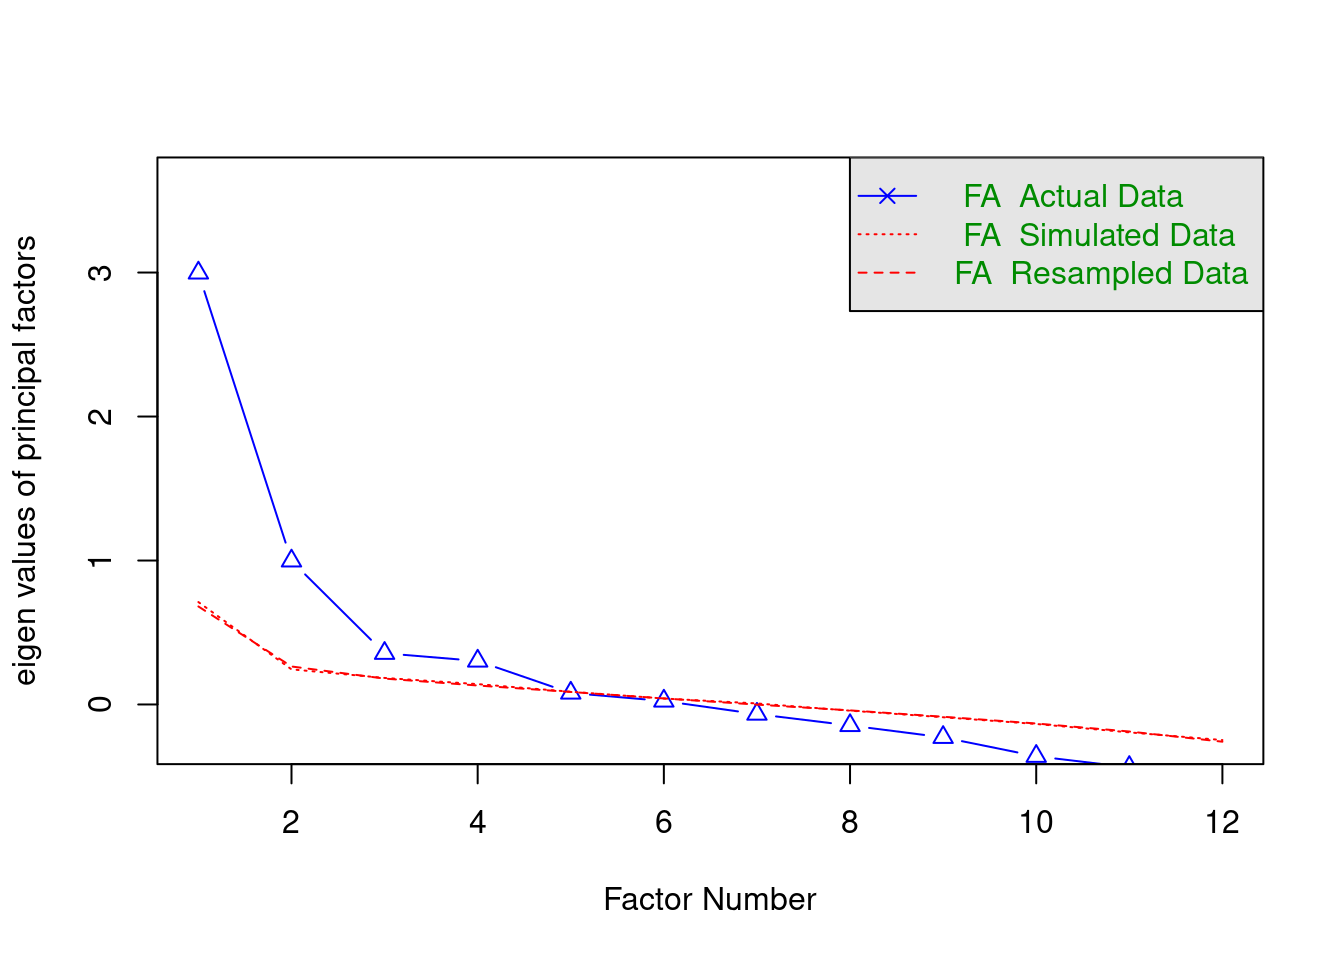

In [ ]:
# Perform factor analysis
# We'll start by estimating the number of factors, then perform the analysis
fa_parallel <- fa.parallel(data, fm = "ml", fa = "fa", main="")

To determine the optimal number of factors for our analysis, we employed parallel analysis, which indicated an optimal number of 4 factors. This estimation serves as a foundation for our subsequent factor analysis. Following this, we executed the factor analysis using the identified number of factors, applying an oblique rotation (oblimin) to allow for potential correlations among the factors. The results of the factor analysis, including the factor loadings, are presented in the output. The factor loadings indicate how strongly each variable contributes to the identified factors, providing insights into the underlying structure of the data.

Caricamento dei namespace richiesti: GPArotation

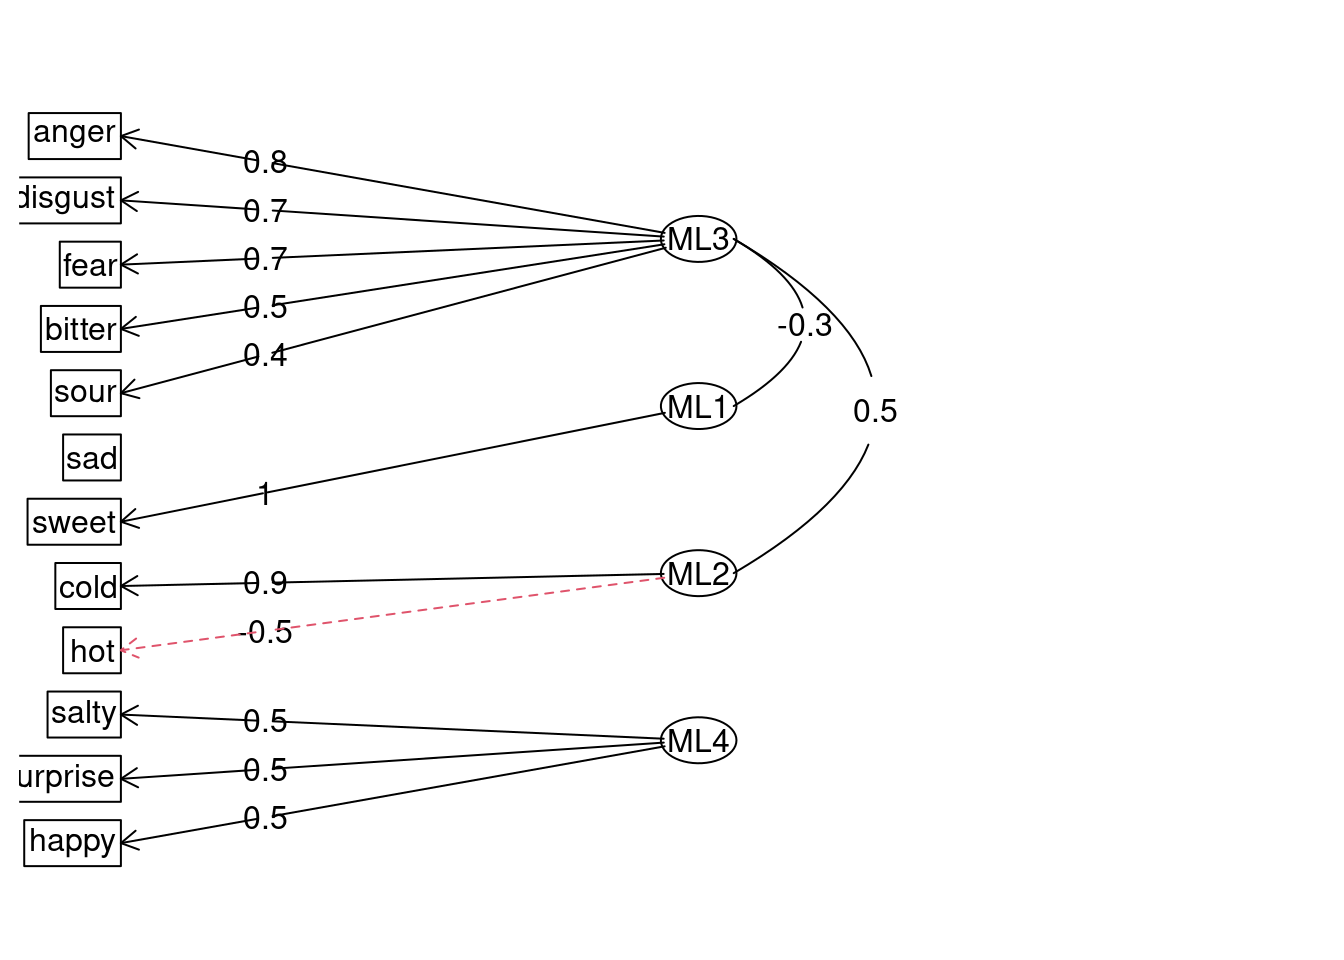

In [ ]:
# Run the factor analysis with the identified number of factors
factor_analysis <- fa(data, nfactors = num_factors, rotate = "oblimin", fm = "ml", scores=TRUE)

In [ ]:
# Display factor loadings
print(factor_analysis$loadings)


Loadings:
         ML3    ML1    ML2    ML4   
salty           -0.231  0.111  0.535
sweet            0.992              
bitter    0.502                     
sour      0.385 -0.128  0.178  0.226
happy    -0.197  0.302 -0.132  0.492
sad       0.292  0.259  0.236       
anger     0.779                     
disgust   0.694               -0.133
fear      0.662         0.133  0.113
surprise                0.120  0.526
hot       0.140  0.361 -0.458  0.267
cold                    0.882       

                 ML3   ML1   ML2   ML4
SS loadings    2.083 1.360 1.146 0.971
Proportion Var 0.174 0.113 0.096 0.081
Cumulative Var 0.174 0.287 0.382 0.463

To visualize the relationships among the factors, we generated biplots for various factor combinations. The biplots, shown in the subsequent figures, illustrate the distribution of variables across the identified factors, highlighting the clustering of adjectives associated with similar emotional states.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb1"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="fu">biplot.psych</span>(</span>
<span id="cb1-2"><a href="#cb1-2" aria-hidden="true" tabindex="-1"></a>  factor_analysis,</span>
<span id="cb1-3"><a href="#cb1-3" aria-hidden="true" tabindex="-1"></a>  <span class="at">choose=</span><span class="fu">c</span>(<span class="dv">1</span>,<span class="dv">2</span>),</span>
<span id="cb1-4"><a href="#cb1-4" aria-hidden="true" tabindex="-1"></a>  <span class="at">smoother =</span> <span class="cn">TRUE</span>,</span>
<span id="cb1-5"><a href="#cb1-5" aria-hidden="true" tabindex="-1"></a>  <span class="at">main =</span> <span class="cn">NULL</span>,</span>
<span id="cb1-6"><a href="#cb1-6" aria-hidden="true" tabindex="-1"></a>  )</span></code></pre></div>
<div class="cell-output-display">
<p>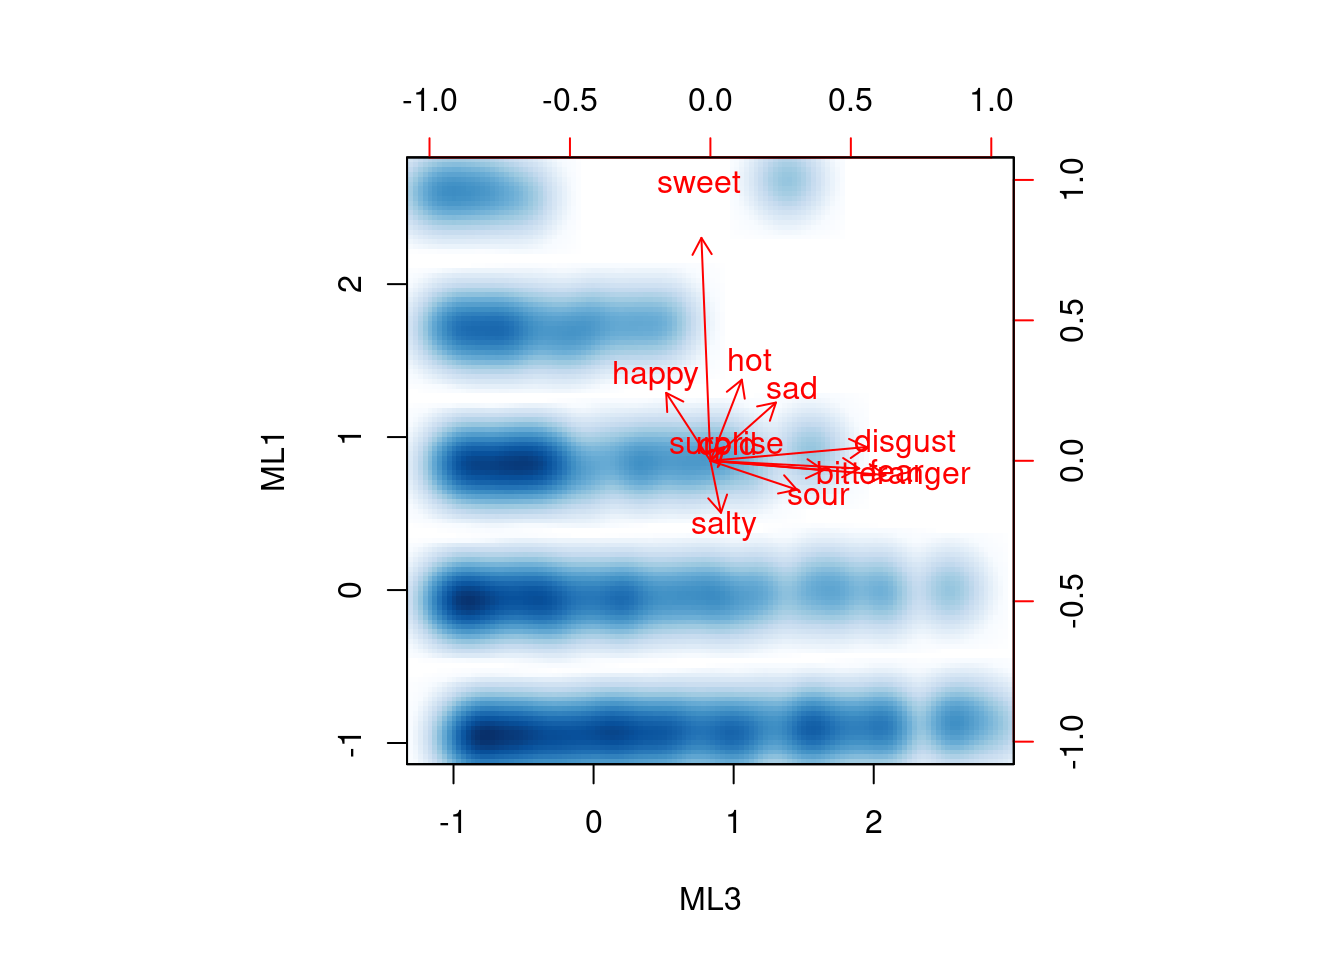</p>
</div>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb2"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb2-1"><a href="#cb2-1" aria-hidden="true" tabindex="-1"></a><span class="fu">biplot.psych</span>(</span>
<span id="cb2-2"><a href="#cb2-2" aria-hidden="true" tabindex="-1"></a>  factor_analysis,</span>
<span id="cb2-3"><a href="#cb2-3" aria-hidden="true" tabindex="-1"></a>  <span class="at">choose=</span><span class="fu">c</span>(<span class="dv">3</span>,<span class="dv">4</span>),</span>
<span id="cb2-4"><a href="#cb2-4" aria-hidden="true" tabindex="-1"></a>  <span class="at">main =</span> <span class="cn">NULL</span>,</span>
<span id="cb2-5"><a href="#cb2-5" aria-hidden="true" tabindex="-1"></a>  <span class="at">smoother =</span> <span class="cn">TRUE</span>)</span></code></pre></div>
<div class="cell-output-display">
<p>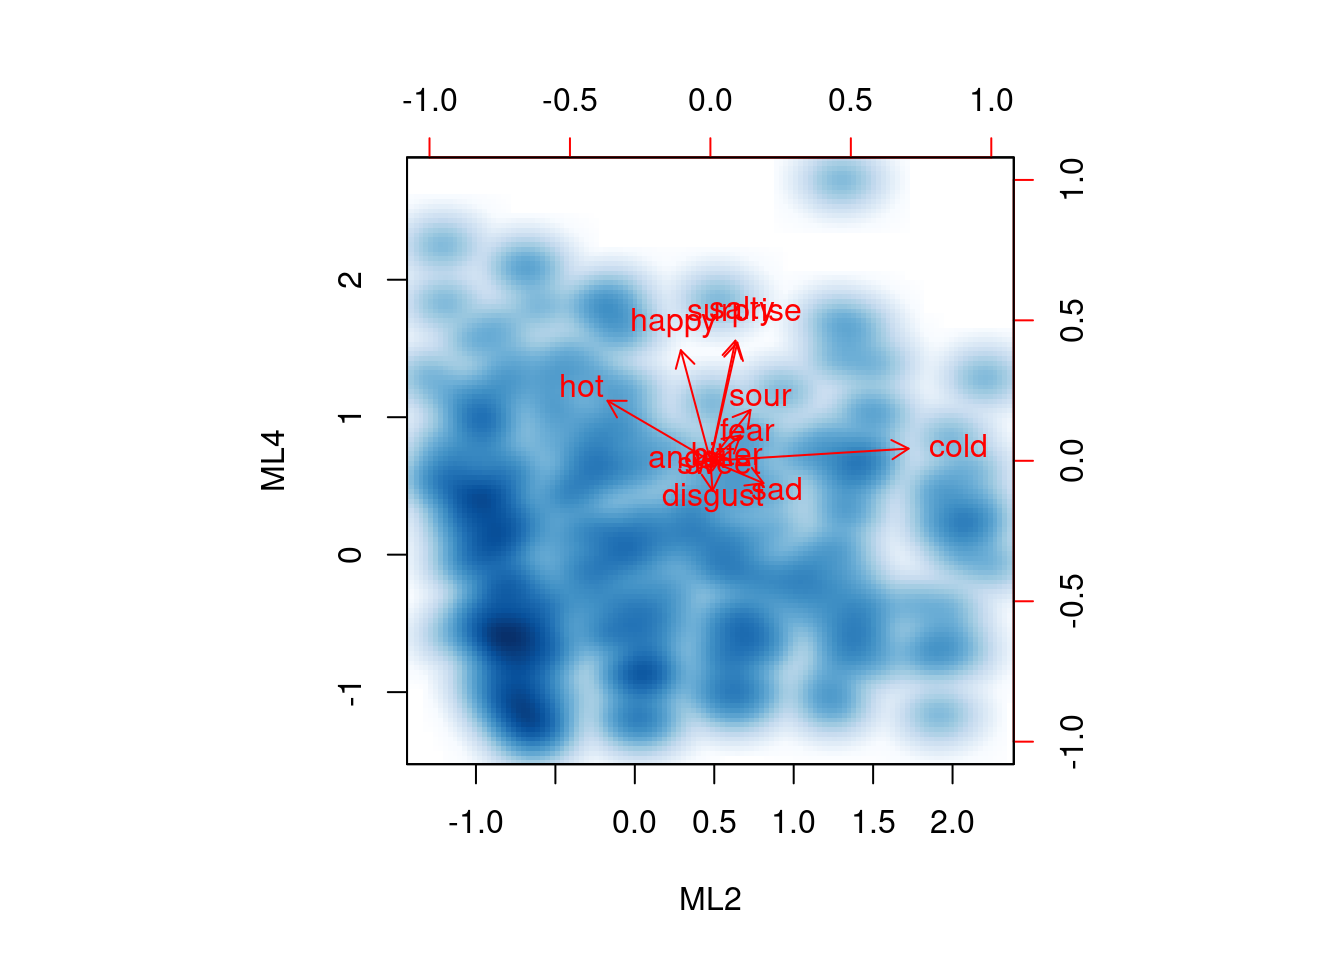</p>
</div>
</div>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb1"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="fu">biplot</span>(</span>
<span id="cb1-2"><a href="#cb1-2" aria-hidden="true" tabindex="-1"></a>  factor_analysis,</span>
<span id="cb1-3"><a href="#cb1-3" aria-hidden="true" tabindex="-1"></a>  <span class="at">choose=</span><span class="fu">c</span>(<span class="dv">1</span>,<span class="dv">3</span>),</span>
<span id="cb1-4"><a href="#cb1-4" aria-hidden="true" tabindex="-1"></a>  <span class="at">main =</span> <span class="cn">NULL</span>,</span>
<span id="cb1-5"><a href="#cb1-5" aria-hidden="true" tabindex="-1"></a>  <span class="at">smoother=</span><span class="cn">TRUE</span></span>
<span id="cb1-6"><a href="#cb1-6" aria-hidden="true" tabindex="-1"></a>)</span></code></pre></div>
<div class="cell-output-display">
<p>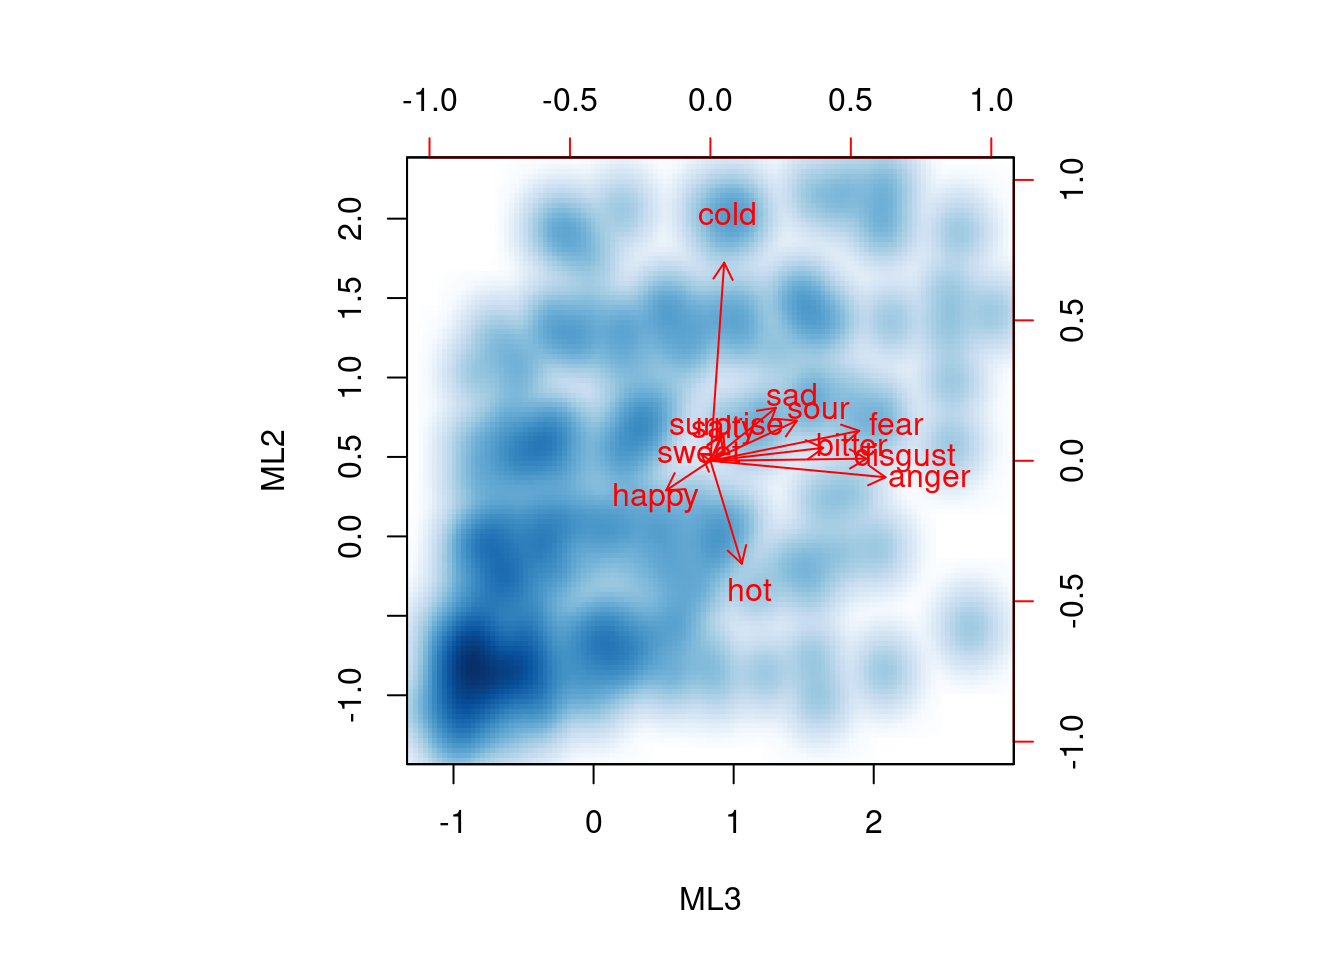</p>
</div>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div class="cell">
<div class="sourceCode" id="cb2"><pre class="sourceCode r cell-code"><code class="sourceCode r"><span id="cb2-1"><a href="#cb2-1" aria-hidden="true" tabindex="-1"></a><span class="fu">biplot</span>(</span>
<span id="cb2-2"><a href="#cb2-2" aria-hidden="true" tabindex="-1"></a>  factor_analysis,</span>
<span id="cb2-3"><a href="#cb2-3" aria-hidden="true" tabindex="-1"></a>  <span class="at">main =</span> <span class="cn">NULL</span>,</span>
<span id="cb2-4"><a href="#cb2-4" aria-hidden="true" tabindex="-1"></a>  <span class="at">smoother =</span> <span class="cn">TRUE</span>,</span>
<span id="cb2-5"><a href="#cb2-5" aria-hidden="true" tabindex="-1"></a>  <span class="at">choose=</span><span class="fu">c</span>(<span class="dv">1</span>,<span class="dv">4</span>),</span>
<span id="cb2-6"><a href="#cb2-6" aria-hidden="true" tabindex="-1"></a>)</span></code></pre></div>
<div class="cell-output-display">
<p>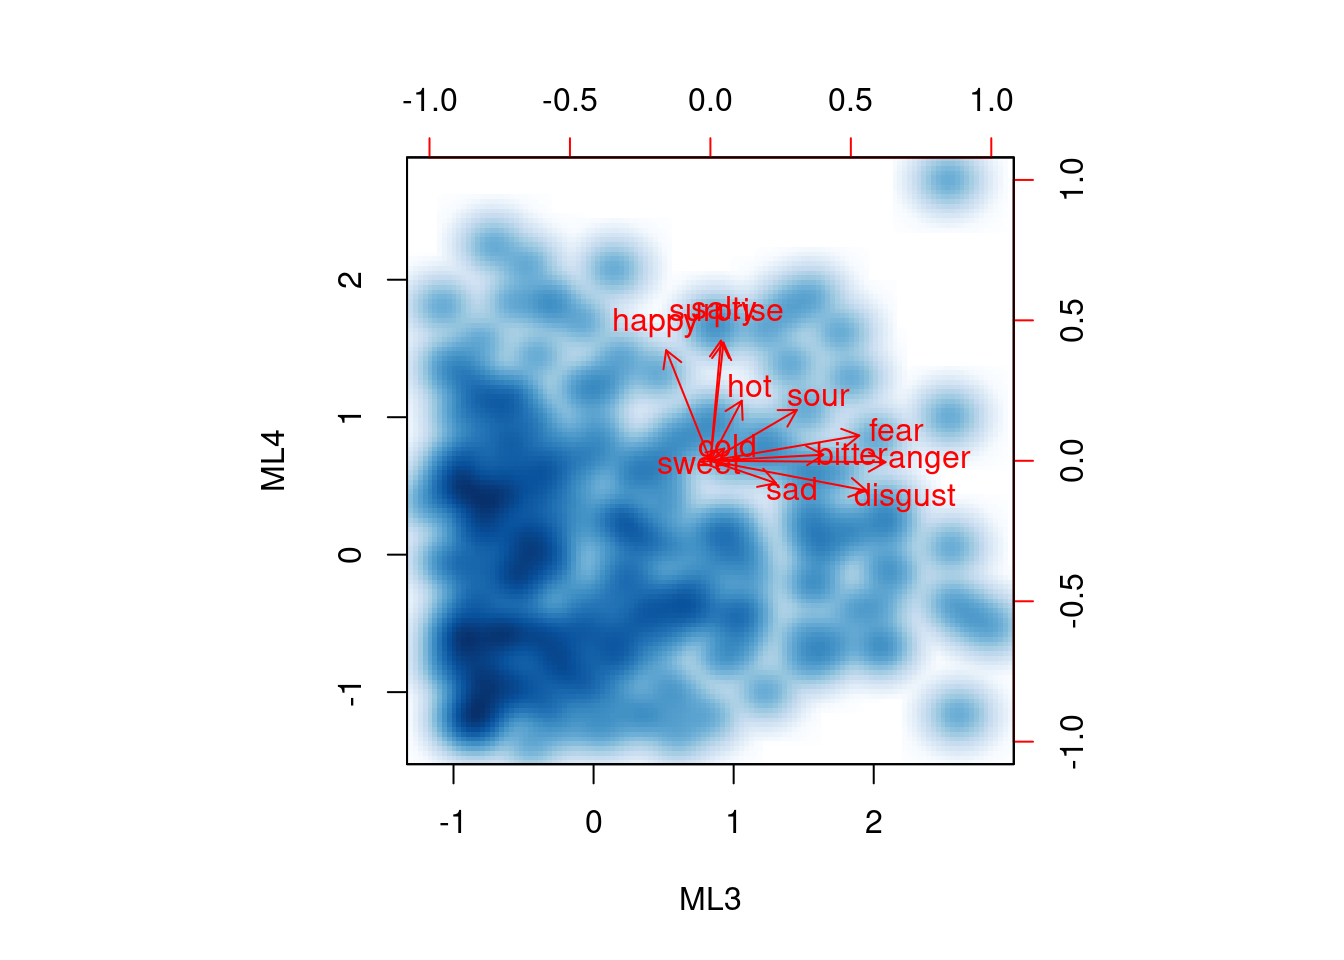</p>
</div>
</div>
</div></td>
</tr>
</tbody>
</table>

Loadings biplot over the four factors.

In [ ]:
library(dplyr)
library(knitr)
library(kableExtra)


Caricamento pacchetto: 'kableExtra'

Il seguente oggetto è mascherato da 'package:dplyr':

    group_rows

  ----------------------------------------------------------------------------
  Prompt   Fattore 1        Fattore 2        Fattore 3        Fattore 4
  -------- ---------------- ---------------- ---------------- ----------------
  bitter   $\mu=-0.01$,     $\mu=-0.06$,     $\mu=0.04$,      $\mu=-0.16$,
           $\sigma=0.82$    $\sigma=0.99$    $\sigma=0.91$    $\sigma=0.69$

  salty    $\mu=-0.13$,     $\mu=-0.03$,     $\mu=0.01$,      $\mu=0.02$,
           $\sigma=0.87$    $\sigma=0.98$    $\sigma=0.94$    $\sigma=0.94$

  sour     $\mu=0.50$,      $\mu=-0.39$,     $\mu=0.23$,      $\mu=0.11$,
           $\sigma=1.02$    $\sigma=0.79$    $\sigma=0.93$    $\sigma=0.74$

  sweet    $\mu=-0.30$,     $\mu=0.43$,      $\mu=-0.26$,     $\mu=0.05$,
           $\sigma=0.74$    $\sigma=1.04$    $\sigma=0.82$    $\sigma=0.80$
  ----------------------------------------------------------------------------


Lastly, we performed a multi-factor analysis to further explore the dimensions of negativity and positivity within the data. The results of this analysis are depicted in the multi-factor diagram, which categorizes the factors into two overarching themes: Negativity and Positivity.

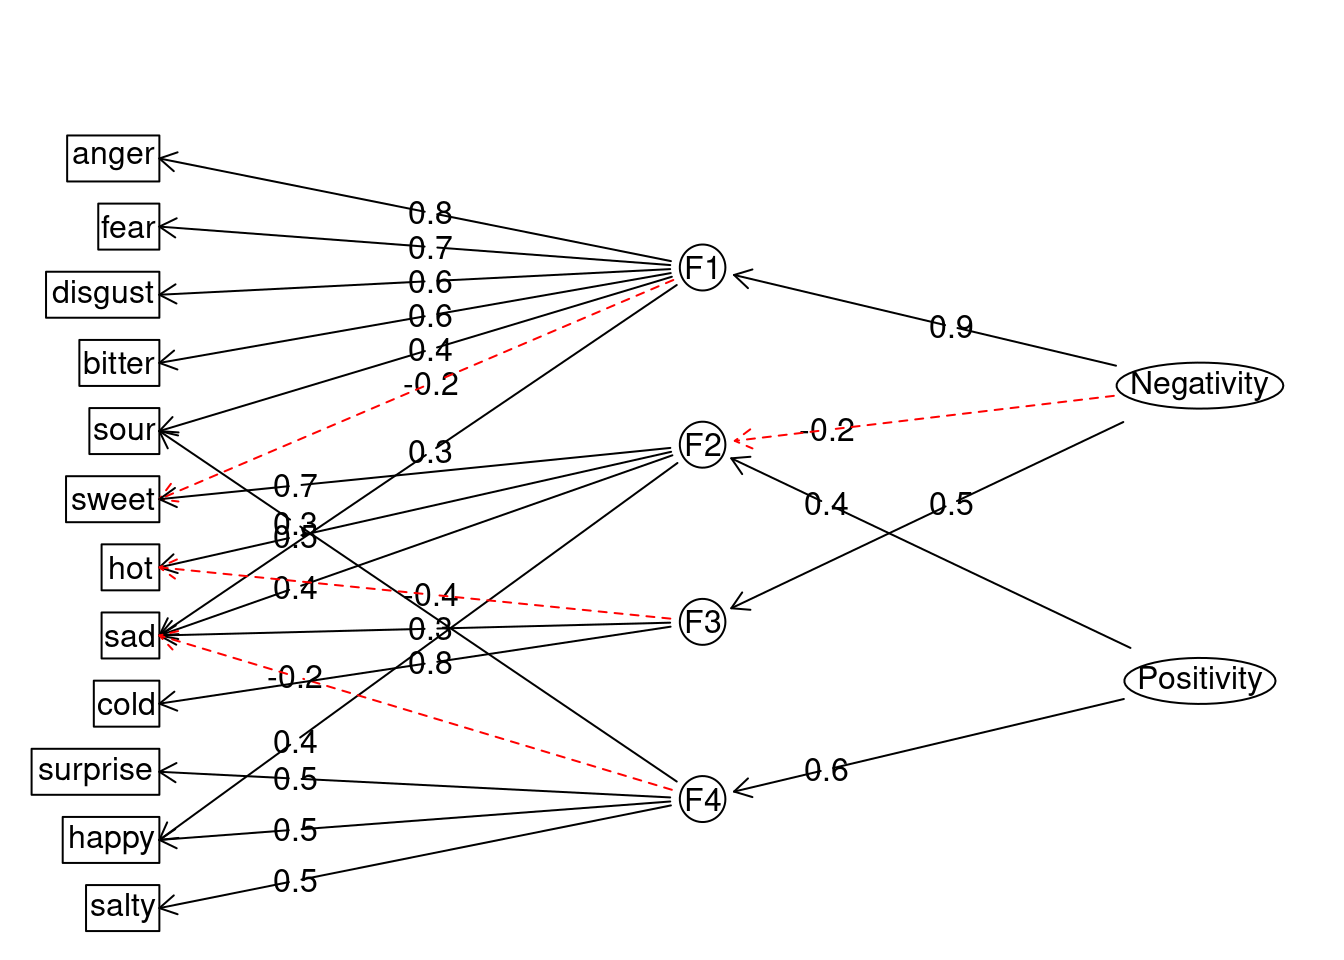

In [ ]:
fam <- fa.multi(data, nfact2=2, nfactors=4)
fa.multi.diagram(fam, f2labels = c("Negativity", "Positivity"), main="")

## References

```` markdown
---
title: "A Multimodal Symphony: Integrating Taste and Sound through Generative AI"
date: 2025-02-01
authors:
  - name: Matteo Spanio
    email: spanio@dei.unipd.it
    id: ms
    url: https://matteospanio.github.io
    orcid: 0000-0002-2436-7208
    affiliation:
      - name: University of Padova
        city: Padua
        url: https://www.unipd.it
    roles: writing
    corresponding: true
  - name: Massimiliano Zampini
    email: massimiliano.zampini@unitn.it
    id: mz
    url: https://webapps.unitn.it/du/en/Persona/PER0000123/Curriculum
    orcid: 0000-0001-5950-7365
    affiliation:
      - name: University of Trento
        city: Rovereto
        url: https://www.unitn.it/
    roles: writing
    corresponding: false
  - name: Antonio Rodà
    email: roda@dei.unipd.it
    id: ar
    url: https://www.dei.unipd.it/~roda/
    orcid: 0000-0001-9921-0590
    affiliation:
      - name: University of Padova
        city: Padua
        url: https://www.unipd.it
    roles: writing
    corresponding: false
  - name: Franco Pierucci
    email: franco.pierucci@soundfood.it
    affiliation:
      - name: SoundFood s.r.l.
        url: https://www.soundfood.it/
    roles: conceptualization
    corresponding: false
abstract: >
  In recent decades, neuroscientific and psychological research by Spence, Wang, Zampini and others has traced direct relationships between taste and auditory perceptions. This article explores multimodal generative models capable of converting taste information into music, building on this foundational research. We provide a brief review of the state of the art in this field, highlighting key findings and methodologies. Additionally, we present an experiment in which we fine-tuned a Large Language Model (LLM) to generate music based on detailed taste descriptions provided for each musical piece. The results are promising: the fine-tuned model produces music that more coherently reflects the input taste descriptions compared to the non-fine-tuned model. This study represents a significant step towards understanding and developing embodied interactions between AI, sound, and taste, opening new possibilities in the field of generative AI.
keywords:
  - Generative AI
  - Crossmodal correspondences
  - Statistical analysis
  - Synesthesia
license: "CC BY"
citation:
  container-title: Frontiers in Computer Science
  volume: TBD
  issue: TBD
funding: "We thank SoundFood s.r.l. for the economic support of this research."
bibliography: references.bib
csl: ieee.csl
---

## Demographic Analysis

The data used for this study were collected through an [online survey](https://www.psytoolkit.org/c/3.4.6/survey?s=YmxcY) via PsyToolkit's web platform [@stoet_psytoolkit_2017]. Inclusion criteria were that participants had to be over eighteen years old and have access to a device capable of playing audio files.

quarto-executable-code-5450563D

```r
#| include: false

library(tidyverse)
library(cluster)
library(psych)

source("src/load_data.R")
```

Of `{r} nrow(data_raw)` people reached, only `{r} nrow(data_pinfo)` completed the questionnaire (`{r} sum(data_pinfo$sex == 'Male')` males, `{r} sum(data_pinfo$sex == 'Female')` females, `{r} sum(data_pinfo$sex == 'Other')` other, `{r} sum(data_pinfo$sex == 'Not specified')` prefer not to say, see @fig-demographic-info-1), null or partial answers were considered as withdrawal from the questionnaire, therefore only complete answers were taken into consideration for the following analysis.

:::: {#fig-demographic-info layout="[[1, 1],[1, 1]]"}
::: {#fig-demographic-info-1}
quarto-executable-code-5450563D

```r
library(ggplot2)

# Assuming your dataframe is named 'data_pinfo' and the gender column is 'sex'
gender_distribution <- data_pinfo |>
  count(sex) |>
  mutate(percentage = n / sum(n) * 100)

ggplot(gender_distribution, aes(x = "", y = percentage, fill = sex)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  theme_void()
```
Gender distribution of participants.
:::

::: {#fig-demographic-info-2}
quarto-executable-code-5450563D

```r
ethnicity_distribution <- data_pinfo |>
  count(ethnicity) |>
  mutate(percentage = n / sum(n) * 100)

ggplot(ethnicity_distribution, aes(x = "", y = percentage, fill = ethnicity)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  theme_void()
```
Distribution of participants’ ethnic backgrounds.
:::

::: {#fig-demographic-info-3}
quarto-executable-code-5450563D

```r
hearing_experience_distribution <- data_pinfo |>
  count(hearing_experience) |>
  mutate(percentage = n / sum(n) * 100)

ggplot(hearing_experience_distribution, aes(x = "", y = percentage, fill = hearing_experience)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  theme_void()
```
Distribution of participants’ hearing experiences.
:::

::: {#fig-demographic-info-4}
quarto-executable-code-5450563D

```r
eating_experience_distribution <- data_pinfo |>
  count(eating_experience) |>
  mutate(percentage = n / sum(n) * 100)

ggplot(eating_experience_distribution, aes(x = "", y = percentage, fill = eating_experience)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  theme_void()
```
Distribution of participants’ eating experiences.
:::
Demographic characteristics of the study’s participants.
::::

Overall the reached population has a mean age of `{r} round(mean(data_pinfo$age, na.rm = TRUE))` years, whit a maximum of `{r} max(data_pinfo$age, na.rm = TRUE)` and a minimum of `{r} min(data_pinfo$age, na.rm = TRUE)`. The mean time spent on the survey was `{r} round(mean(data_pinfo$time, na.rm = TRUE))` minutes, with a standard deviation of `{r} round(sd(data_pinfo$time, na.rm = TRUE), 1)`. Along with age, gender and execution time also data about musical and eating experience have been collected: @fig-demographic-info-2 displays the ethnicity distribution of the population, the majority of participants recognize themself as *White/European American*, participants have an almost equally distributed experience in listening to music (see @fig-demographic-info-3), while just one participant recognized himself as an experienced eater and the major part of the sample population declared to be not-experienced in tasting food (@fig-demographic-info-4).

## Model Preference Analysis

The first task in the survey involved participants listening to two audio clips, each corresponding to a taste description chosen randomly from *sweet*, *sour*, *bitter*, and *salty*. The goal was to determine which audio sample best matched the given taste description. The two clips were generated by different versions of the MusicGEN model [@copet2024simplecontrollablemusicgeneration]: a fine-tuned version and the original [^1], base model, released by Meta. Participants were asked to express their preference for the first or second clip by moving a slider ranging from 0 to 10, where 0 indicated a strong preference for the first clip and 10 indicated a strong preference for the second, @fig-task1 shows the survey's first question interface.

[^1]: A full description of the model and its finetuning process is available at the publication related to this analysis.

![Screenshot of the survey's first task interface.](assets/img/model_preference_woh.png){#fig-task1 .lightbox}

To ensure randomization and avoid any bias, the taste descriptions and audio clips were presented in a random order. In the analysis the scores are normalized as follows: scores from 0 to 4 are interpreted as a preference for the base model, scores between 6 and 10 indicate a preference for the fine-tuned model, and scores of 5 are treated as neutral.

The underlying research question guiding this task was to assess if the fine tuned model output better matches taste descriptions than the sounds generated by the base model.

### Data Visualization

The distribution of scores across all participants is presented in @fig-model-pref-1. The histogram and density plot show the spread of scores, allowing us to visually assess the preference for one model over the other. The base model and fine-tuned model preferences are expected to manifest as peaks around the lower and higher end of the score range, respectively.

:::: {#fig-model-pref layout="[[1, 1], [1]]"}

::: {#fig-model-pref-1}
quarto-executable-code-5450563D

```r
ggplot(data_task1, aes(x = score)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(aes(y = after_stat(count)), fill = "lightgreen", alpha = 0.4) +
  labs(x = "Score", y = "Count") +
  theme_minimal()
```

Overall evalutation of the models.
:::

::: {#fig-model-pref-2}

quarto-executable-code-5450563D

```r
ggplot(data_task1, aes(x = prompt, y = score, fill = prompt)) +
  geom_violin() +
  geom_hline(yintercept = 5, color = "red", linetype = "dashed", linewidth = 1) +
  labs(
    x = "Taste",
    y = "Score"
  ) +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal() +
  theme(legend.position = "none")
```

Score boxplot by taste category.
:::

::: {#fig-model-pref-3}
quarto-executable-code-5450563D

```r
# Creazione dei grafici per ciascun valore della variabile 'prompt'
ggplot(data_task1, aes(x = score)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(aes(y = after_stat(count)), fill = "lightgreen", alpha = 0.4) +
  labs(x = "Score", y = "Count") +
  theme_minimal() +
  facet_wrap(~ prompt, scales = "free_y")
```
Score distribution by taste category.

:::

Score distribution between the two models.
::::

@fig-model-pref-2 goes further by breaking down the preferences based on the taste category described in the audio sample. Each taste category is visualized using boxplots, where the median score for each taste can be assessed. This enables us to examine whether the model preference varies depending on the taste label, with the red dashed line at a score of 5 acting as the neutral threshold.




### Hypothesis Testing

Next, we assess whether the average score for the audio samples significantly differs from a neutral score of 5, under the assumption that the preference for the fine-tuned model should be greater than this threshold. To do this, we need to verify whether the data follows a normal distribution.
In order to assess normality of data we applied both visual and computational methods, then firstly a Q-Q plot was generated to visually inspect the normality of the score distribution, see @fig-qqplot. The resulting plot shows deviations from the expected straight line, indicating that the scores do not follow a normal distribution.

quarto-executable-code-5450563D

```r
#| label: fig-qqplot
#| fig-cap: Q-Q plot to assess the normality distribution of the collected data.
library(qqplotr)

ggplot(data_task1, aes(sample = score)) +
  stat_qq_band(bandType="pointwise", fill="#8DA0CB",alpha=0.4) +
  stat_qq_line(color = "#8DA0CB") +
  stat_qq_point() +
  labs(
    x = "Theoretical Quantiles",
    y = "Sample Quantiles"
  ) +
  theme_minimal()
```


quarto-executable-code-5450563D

```r
# Test Shapiro-Wilk
shapiro.pvalue <- (shapiro.test(data_task1$score))$p.value
```
In addition the Shapiro-Wilk test confirmed that the data significantly deviate from a normal distribution (with a resulting $p$-value equals to $`{r} signif(shapiro.pvalue, digits = 4)`$). Therefore, we decide to apply the non-parametric Wilcoxon signed-rank test to see if the models preference score expressed by participants has a mean major than the null preference (score equals to five), more formally we are testing the hypothesis:

$$
H_0: \mu = 5 \quad H_1: \mu > 5
$$
where $H_0$ means that there is no preference between the two models while $H_1$ means that the fine-tuned model is preferred over the other one with a $95%$ confidence interval.

quarto-executable-code-5450563D

```r
alpha <- 0.05
hyp_mu <- 5

wilcox.pvalue <- (wilcox.test(data_task1$score, mu = hyp_mu, alternative = "greater", conf.level = 1-alpha))$p.value
```

The result of the Wilcoxon test shows a $p$-value of $`{r} signif(wilcox.pvalue, digits = 4)`$, which is less than $0.05$, indicating that we can reject the null hypothesis and conclude that the median score is indeed significantly greater than $5$. This supports the hypothesis that the participants prefer the fine-tuned model overall.

### Post-Hoc Analysis by Taste

While the Wilcoxon test confirms that the overall preference goes to the fine-tuned model the boxplots reveal a variation of the score by taste, to confirm the variation we perform separate Wilcoxon tests for each taste group (*sweet*, *sour*, *bitter*, *salty*). We use a Bonferroni correction to adjust for the multiple comparisons and control the family-wise error rate. The results of the post-hoc tests are shown below, in @tbl-wilcoxon-taste.

quarto-executable-code-5450563D

```r
#| label: tbl-wilcoxon-taste
#| tbl-cap: Results of the Wilcoxon test performed on data filtered by taste.

library(knitr)

levels_taste <- unique(data_task1$prompt)

# List to stpre the results
test_results <- list()

# Execute the Wicoxon test for each category
for (level in levels_taste) {
  # Filter data
  subset_data <- data_task1[data_task1$prompt == level, ]

  test_result <- wilcox.test(subset_data$score, mu = 5, alternative = "greater", conf.level = 1 - alpha)

  # Add the category result
  test_results[[level]] <- test_result
}

# extract the pvalues
p_values <- sapply(test_results, function(res) res$p.value)

# apply the Bonferroni correction
adjusted_p_values <- p.adjust(p_values, method = "bonferroni")

# Visualizza i risultati con i p-value corretti
result_table <- data.frame(
  Taste = names(test_results),
  p.value = p_values,
  adjusted.p.value = adjusted_p_values
) |> select(c("p.value", "adjusted.p.value"))

kable(result_table)
```

The analysis reveals that the fine-tuned model was significantly preferred for the sweet taste category, with an adjusted $p$-value of $`{r} adjusted_p_values[4]`$, well below the conventional threshold of $0.05$. This suggests a strong alignment between the musical outputs and participants’ expectations of sweetness.
Conversely, the bitter and sour categories also exhibited significant preferences, with adjusted $p$-values of $`{r} adjusted_p_values[1]`$ and $`{r} adjusted_p_values[3]`$, respectively. However, these results, while statistically significant, indicate a less robust preference compared to the sweet category.
Notably, the salty taste group did not demonstrate a significant preference for the fine-tuned model, as indicated by an adjusted $p$-value near to 1. This lack of significance suggests that the model’s performance may not align with participants’ expectations for salty flavors, warranting further investigation into the underlying factors influencing this outcome.

quarto-executable-code-5450563D

```r
subset_data <- data_task1[data_task1$prompt == "salty", ]
salty_base <- wilcox.test(subset_data$score, mu = 5, alternative = "less", conf.level =1 - alpha)$p.value
```

Since the finetuned model did not show to perform well on the salty group, we performed a Wilcoxon test to test if its mean is significally lower than the tie situation ($H_0: \mu_{\text{salty}} = 5, H_1: \mu_{\text{salty}} < 5$) the result is that the first model is statistically preferred over the finetuned variant according to the Wilcoxon test with a $p$-value equal to $`{r} salty_base`$ without Bonferroni correction[^2].

[^2]: The Bonferroni correction has not been applied due to the non indepenent nature of the test, in fact the test has been performed after the results of the previous Wilcoxon test, which, instead, was testing independently 4 groups.

## Recognisability of Tastes

In the second task of the survey, participants were asked to listen to musical pieces generated exclusively by the fine-tuned model to better investigate the intrinsic qualities carried by the generated music. Following each listening session, participants were required to quantify the flavors they perceived in the music using a graduated scale, ranging from 1 to 5 (where 1 means *not at all* and 5 means *very much*), for each of the four primary taste categories: salty, sweet, bitter, and sour. Unlike the first task, there were no imposed labels for specific flavors, allowing participants the freedom to associate values with each taste based on their personal interpretations of the musical experience.
Additionally, to enrich the assessment, participants had to evaluate their emotional responses to the music by rating various non-gustatory parameters, including happiness, sadness, anger, disgust, fear, surprise, hot, and cold. @fig-task2 displays the web interface used to collect participants' responses.

![Screenshot of the survey's second task interface.](assets/img/music_synesthesia.png){#fig-task2 .lightbox}

The underlying research questions guiding this task were:

1. Can the music generated by the model induce sensory-gustatory responses?
2. What correlations exist between music and taste?
3. Which emotions mediate these sensory responses?

### ANOVA test

To address the first research question, we performed an Analysis of Variance (ANOVA) to evaluate whether the participants' ratings of stimuli varied according to distinct stimulus characteristics. The dependent variable was the value assigned by participants to each stimulus, while the independent variables included stimulus-related factors. The dataset was filtered to include only participants identifying as *Male* or *Female*, excluding participants classified as *Professional Eaters* due to insufficient representation of this category. This preprocessing step ensured robust and meaningful comparisons between groups.

quarto-executable-code-5450563D

```r
#| label: tbl-anova-value
#| tbl-cap: Results of the ANOVA test.
library(broom)

df <- data_aov |>
  filter(sex == "Male" | sex == "Female") |>  # too few people recognize themself as non male/female
  filter(eating_experience != "Professional") # the only professional eater is filtered out

res <- aov(value ~ prompt * adjective + hearing_experience + eating_experience + sex, data = df)
kable(tidy(res), digits = c(0, 0, 3, 3, 3, 3),
      col.names = c("", "Df", "Sum Sq", "Mean Sq", "F value", "Pr(>F)"))
```

The results of the ANOVA are summarized in @tbl-anova-value, which presents the degrees of freedom (Df), sum of squares (Sum Sq), mean squares (Mean Sq), F-statistics, and $p$-values for each factor and interaction.

Prior to interpreting the results, the homoskedasticity assumption was assessed by examining the residuals. A Shapiro-Wilk test indicated evidence of heteroskedasticity ($p < 0.05$). Despite this violation, the ANOVA analysis proceeded, following recommendations from prior research [@glass_1972_consequences_of_failure; @harwell_1992_meta-analytic_methods; @lix_1996_presence_of_variance] suggesting that ANOVA is robust to deviations from normality under moderate violations, particularly with large sample sizes such as the one in this study.
The results show that different prompts and adjectives lead to significantly different adjectives quantified by participants, similarly the adjectives used influence the participants’ feelings. Furthermore the significant interaction effect implies that the effect of one variable depends on the level of the other. In other words, the way a prompt influences feelings may vary depending on the adjective used. This result highlights that the participants to the survey deliberately operated consistent choices while evaluating the stimuli.

### Post-Hoc Analysis

To further explore the results of the ANOVA, we conducted Tukey’s Honest Significant Difference (HSD) test. This post-hoc analysis is particularly useful for identifying which specific group means are significantly different from each other after finding a significant overall effect in the ANOVA. Given that our analysis revealed significant main effects for prompt, adjective, their interaction and the hearing experience, it is essential to determine the nature of these differences.

The Tukey test compares all possible pairs of group means while controlling for the family-wise error rate, thus providing a robust method for multiple comparisons. This is crucial in our context, as we aim to understand how different prompts, adjectives and hearing experience levels influence participants’ evaluations of the stimuli.
Upon executing the Tukey test, we examined the adjusted $p$-values for each comparison. The results indicated several significant differences between specific combinations of prompts and adjectives, as summarized in the table below:

quarto-executable-code-5450563D

```r
res <- aov(value ~ prompt + adjective + hearing_experience, data = data_aov)
tukey <- TukeyHSD(res)

# For each Tukey result, filter where p adj is less than 0.05
significant_prompts <- as.data.frame(tukey$prompt) |> filter(`p adj` < 0.05)
significant_adjectives <- as.data.frame(tukey$adjective) |> filter(`p adj` < 0.05)
significant_hearing_experience <- as.data.frame(tukey$hearing_experience) |> filter(`p adj` < 0.05)
```

quarto-executable-code-5450563D

```r
#| tbl-cap: Tukey test between different prompts with a $p$-value lower 0.05.
kable(significant_prompts)
```

quarto-executable-code-5450563D

```r
#| tbl-cap: Tukey test between different adjectives with a $p$-value lower 0.05.
kable(significant_adjectives)
```

quarto-executable-code-5450563D

```r
#| tbl-cap: Tukey test between different hearing experience groups with a $p$-value lower 0.05.
kable(significant_hearing_experience)
```

These significant comparisons illuminate the subtleties in participants’ responses to different stimuli. Certain prompt-adjective combinations elicited stronger emotional reactions than others, indicating that the interaction between prompts and adjectives significantly shapes participants’ perceptions.
Notably, some combinations yielded adjusted $p$-values below the conventional threshold of $0.05$, signifying statistically significant differences. This finding reinforces the ANOVA results, confirming that the presentation of prompts and adjectives can meaningfully impact emotional responses.

### Interaction between *prompt* and *adjective*

The ANOVA analysis evidenced also a significant interaction between prompt and adjectives used to evaluate the sounds, as we know, the design of the experiment fixed the prompt before generating the audio files, therefore adjectives has to be intended as dependent variables while the prompts are independent; in other words, participants assigned different values to the adjectives to the sounds on the basis of their generation prompt. This interaction can be seen in @fig-heatmap. In particular @fig-heatmap-taste shows the mean value assigned to each taste adjective by their prompt, we can clearly seen the major diagonal emerge by the $4 \times 4$ matrix, this means that, the mean value assigned to the adjective that matches the prompt of each sound is the highest. The rest of the interaction between adjectives and prompt can be seen in @fig-heatmap-emotions , a deeper analysis of emotional aspect assigned to the sounds is presented in the next section.

:::: {#fig-heatmap layout="[[1, 1]]"}
::: {#fig-heatmap-taste}
quarto-executable-code-5450563D

```r
library(reshape2)

# Calcolo della media per ciascun prompt
heatmap_data <- data_task2 |>
  group_by(prompt) |>
  summarise(
    sour = mean(sour, na.rm = TRUE),
    sweet = mean(sweet, na.rm = TRUE),
    bitter = mean(bitter, na.rm = TRUE),
    salty = mean(salty, na.rm = TRUE)
  )

# Riorganizzazione per la heatmap
heatmap_matrix <- heatmap_data |>
  pivot_longer(cols = -prompt, names_to = "adjective", values_to = "mean_value") |>
  pivot_wider(names_from = adjective, values_from = mean_value) |>
  column_to_rownames("prompt") |>
  as.matrix()

axis_order <- c("bitter", "salty", "sour", "sweet")

# Creazione della heatmap con ggplot2
heatmap_plot <- heatmap_data |>
  pivot_longer(cols = -prompt, names_to = "adjective", values_to = "mean_value") |>
  mutate(
    prompt = factor(prompt, levels = rev(axis_order)),
    adjective = factor(adjective, levels = axis_order)
  ) |>
  ggplot(aes(x = adjective, y = prompt, fill = mean_value)) +
  geom_tile() +
  geom_text(aes(label = round(mean_value, 2)), color = "black", size = 4) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(
    x = "Adjective",
    y = "Prompt",
    fill = "Mean value"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Mostrare il grafico
print(heatmap_plot)
```
Heatmap of perceived taste in correspondence of the intended one.
:::

::: {#fig-heatmap-emotions}
quarto-executable-code-5450563D

```r
# Calcolo della media per ciascun prompt
heatmap_data <- data_task2 |>
  group_by(prompt) |>
  summarise(
    happy = mean(happy, na.rm = TRUE),
    sad = mean(sad, na.rm = TRUE),
    anger = mean(anger, na.rm = TRUE),
    disgust = mean(disgust, na.rm = TRUE),
    fear = mean(fear, na.rm = TRUE),
    surprise = mean(surprise, na.rm = TRUE),
    hot = mean(hot, na.rm = TRUE),
    cold = mean(cold, na.rm = TRUE)
  )

# Riorganizzazione per la heatmap
heatmap_matrix <- heatmap_data |>
  pivot_longer(cols = -prompt, names_to = "adjective", values_to = "mean_value") |>
  pivot_wider(names_from = adjective, values_from = mean_value) |>
  column_to_rownames("prompt") |>
  as.matrix()

# Definire l'ordine degli assi
axis_order <- c("sad", "anger", "disgust", "fear", "surprise", "happy", "hot", "cold")

# Creazione della heatmap con ggplot2
heatmap_plot <- heatmap_data |>
  pivot_longer(cols = -prompt, names_to = "adjective", values_to = "mean_value") |>
  mutate(
    prompt = factor(prompt, levels = rev(unique(prompt))),
    adjective = factor(adjective, levels = axis_order)
  ) |>
  ggplot(aes(x = adjective, y = prompt, fill = mean_value)) +
  geom_tile() +
  geom_text(aes(label = round(mean_value, 2)), color = "black", size = 4) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(
    x = "Adjective",
    y = "Prompt",
    fill = "Mean Value"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Mostrare il grafico
print(heatmap_plot)
```
Heatmap of perceived emotional response in correspondence of the suggested taste.
:::
Heatmaps
::::

### Factorial analysis

quarto-executable-code-5450563D

```r
# Standardize the data excluding the 'taste' column
data <- data_task2 |> select(-prompt)
```

To explore the underlying relationships between sensory qualities and emotional states, we conducted a factor analysis on the standardized data, excluding the ‘taste’ column. The initial step involved calculating the correlation matrix, which revealed notable relationships among the adjectives. Specifically, we observed that negative emotions were positively correlated, while the pair happy-sad exhibited a negative correlation. Furthermore, sweetness demonstrated a strong correlation with happiness and warmth, whereas bitterness was associated with anger and fear. Sourness, on the other hand, was evidently correlated with disgust and fear. Other variables did not show strong correlations at first glance, prompting us to proceed with the factor analysis.

quarto-executable-code-5450563D

```r
#| label: fig-corr-matrix
#| fig-cap: Correlation matrix
library("ggcorrplot")

cor_matrix <- cor(data)

ggcorrplot(cor_matrix,
           lab = TRUE,
           lab_size = 2.9,
           type="lower")
```
The correlation matrix is illustrated in @fig-corr-matrix, showcasing these relationships clearly.

```{r message=FALSE}
#| label: fig-scree-plots
#| fig-cap: Parallel Analysis Scree Plots
#| message: false
# Perform factor analysis
# We'll start by estimating the number of factors, then perform the analysis
fa_parallel <- fa.parallel(data, fm = "ml", fa = "fa", main="")
num_factors <- fa_parallel$nfact # Optimal number of factors from parallel analysis
```

To determine the optimal number of factors for our analysis, we employed parallel analysis, which indicated an optimal number of `{r} num_factors` factors. This estimation serves as a foundation for our subsequent factor analysis.
Following this, we executed the factor analysis using the identified number of factors, applying an oblique rotation (oblimin) to allow for potential correlations among the factors. The results of the factor analysis, including the factor loadings, are presented in the output. The factor loadings indicate how strongly each variable contributes to the identified factors, providing insights into the underlying structure of the data.

quarto-executable-code-5450563D

```r
#| label: fig-factor-analysis
#| fig-cap: Factor analysis graph.

# Run the factor analysis with the identified number of factors
factor_analysis <- fa(data, nfactors = num_factors, rotate = "oblimin", fm = "ml", scores=TRUE)

fa.diagram(factor_analysis, main="")
```

quarto-executable-code-5450563D

```r
# Display factor loadings
print(factor_analysis$loadings)
```

To visualize the relationships among the factors, we generated biplots for various factor combinations. The biplots, shown in the subsequent figures, illustrate the distribution of variables across the identified factors, highlighting the clustering of adjectives associated with similar emotional states.

:::: {#fig-fa-biplot layout="[[1, 1], [1, 1]]"}

::: {#fig-fa-biplot-1}
quarto-executable-code-5450563D

```r
biplot.psych(
  factor_analysis,
  choose=c(1,2),
  smoother = TRUE,
  main = NULL,
  )
```
:::

::: {#fig-fa-biplot-2}
quarto-executable-code-5450563D

```r
biplot.psych(
  factor_analysis,
  choose=c(3,4),
  main = NULL,
  smoother = TRUE)
```
:::

::: {#fig-fa-biplot-3}
quarto-executable-code-5450563D

```r
biplot(
  factor_analysis,
  choose=c(1,3),
  main = NULL,
  smoother=TRUE
)
```
:::

::: {#fig-fa-biplot-4}
quarto-executable-code-5450563D

```r
biplot(
  factor_analysis,
  main = NULL,
  smoother = TRUE,
  choose=c(1,4),
)
```
:::

Loadings biplot over the four factors.
::::

quarto-executable-code-5450563D

```r
library(dplyr)
library(knitr)
library(kableExtra)

# Creiamo un dataframe con gli scores e il prompt
scores_df <- cbind(data_task2["prompt"], as.data.frame(factor_analysis$scores))

# Rinominare le colonne dei fattori se necessario
colnames(scores_df)[2:5] <- paste0("Factor", 1:4)

# Calcoliamo la media e la deviazione standard per ogni fattore, raggruppati per prompt
summary_table <- scores_df |>
  group_by(prompt) |>
  summarise(across(starts_with("Factor"),
                   list(mu = mean, sigma = sd),
                   .names = "{.col}_{.fn}"))

# Riorganizziamo i dati in un formato tabellare con le coppie (mu, sigma)
summary_table_formatted <- summary_table |>
  mutate(across(contains("_mu"),
                ~ sprintf("$\\mu=%.2f$, $\\sigma=%.2f$", .x, get(sub("_mu", "_sigma", cur_column())))))

# Selezioniamo solo le colonne formattate
summary_table_kable <- summary_table_formatted |>
  select(prompt, contains("_mu"))

# Rinominiamo le colonne per renderle più leggibili
colnames(summary_table_kable) <- c("Prompt", paste0("Fattore ", 1:4))

# Creiamo la tabella con kableExtra
kable(summary_table_kable)
```

Lastly, we performed a multi-factor analysis to further explore the dimensions of negativity and positivity within the data. The results of this analysis are depicted in the multi-factor diagram, which categorizes the factors into two overarching themes: Negativity and Positivity.

::: {#fig-multilevel-fa}
quarto-executable-code-5450563D

```r
fam <- fa.multi(data, nfact2=2, nfactors=4)
fa.multi.diagram(fam, f2labels = c("Negativity", "Positivity"), main="")
```

Hierarchical (multilevel) factors' structure.
:::

## References

::: {#refs}
:::
````